In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Carico i dati

In [2]:
df = pd.read_csv("Train_newColumns.csv", 
                 skipinitialspace=True, sep=',', nrows=2000)
df.head()

Age  Attrition BusinessTravel              Department  DistanceFromHome  \
0   37          0  Travel_Rarely  Research & Development                 4   
1   36          0  Travel_Rarely  Research & Development                 5   
2   36          1  Travel_Rarely  Research & Development                11   
3   24          0  Travel_Rarely  Research & Development                11   
4   58          0  Travel_Rarely  Research & Development                 1   

   Education    EducationField  EnvironmentSatisfaction  Gender  \
0          3           Medical                        4       1   
1          3  Technical Degree                        3       0   
2          2           Medical                        1       0   
3          2           Medical                        3       0   
4          4           Medical                        1       1   

   JobInvolvement  ... OverTime  PercentSalaryHike RelationshipSatisfaction  \
0               3  ...        0                 12                        4   
1               2  ...        1                 13                        4   
2               1  ...        0                 15                        1   
3               3  ...        1                 12                        4   
4               2  ...        0                 20                        3   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                 10                      3   
1                 1                 18                      2   
2                 0                 15                      2   
3                 0                  6                      3   
4                 0                 23                      3   

   WorkLifeBalance  YearsAtCompany  YearsWithCurrManager  Stagnation  
0                2               5                     3           4  
1                3               4                     4           0  
2                1               6                     0           0  
3                2               6                     1           0  
4                2               6                     6          36  

[5 rows x 25 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1013 non-null   int64 
 1   Attrition                 1013 non-null   int64 
 2   BusinessTravel            1013 non-null   object
 3   Department                1013 non-null   object
 4   DistanceFromHome          1013 non-null   int64 
 5   Education                 1013 non-null   int64 
 6   EducationField            1013 non-null   object
 7   EnvironmentSatisfaction   1013 non-null   int64 
 8   Gender                    1013 non-null   int64 
 9   JobInvolvement            1013 non-null   int64 
 10  JobRole                   1013 non-null   object
 11  JobSatisfaction           1013 non-null   int64 
 12  MaritalStatus             1013 non-null   object
 13  MonthlyIncome             1013 non-null   int64 
 14  NumCompaniesWorked      

Ragioniamo sugli attributi

In [4]:
set(df['Age'])

{18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58}

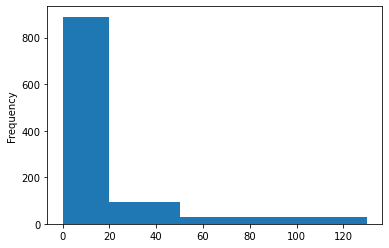

In [5]:
df['Stagnation'].plot(kind='hist', bins=[0, 20, 50, 130])
plt.show()

# Pre-processing

In [6]:
df['AgeBin'] = pd.cut(df['Age'].astype(int), 4, right=False)
df['AgeBin'] = df['AgeBin'].astype(str) + '_Age'

df['AgeBin']

0        [28.0, 38.0)_Age
1        [28.0, 38.0)_Age
2        [28.0, 38.0)_Age
3        [18.0, 28.0)_Age
4       [48.0, 58.04)_Age
              ...        
1008     [28.0, 38.0)_Age
1009     [28.0, 38.0)_Age
1010     [38.0, 48.0)_Age
1011     [28.0, 38.0)_Age
1012     [38.0, 48.0)_Age
Name: AgeBin, Length: 1013, dtype: object

In [7]:
i = 0
df['AttritionCat'] = df['Attrition'].astype(str)
for record in df['AttritionCat']:
    if df.at[i, 'Attrition'] == 0:
        df.at[i, 'AttritionCat'] = 'No_Attr'
    elif df.at[i,'Attrition'] == 1:
        df.at[i,'AttritionCat'] = 'Yes_Attr'
    i += 1
    
df['AttritionCat']

0        No_Attr
1        No_Attr
2       Yes_Attr
3        No_Attr
4        No_Attr
          ...   
1008     No_Attr
1009    Yes_Attr
1010    Yes_Attr
1011    Yes_Attr
1012    Yes_Attr
Name: AttritionCat, Length: 1013, dtype: object

In [8]:
i = 0
df['DistanceFromHomeBin'] = df['DistanceFromHome'].astype(str)
for record in df['DistanceFromHomeBin']:
    if df.at[i, 'DistanceFromHome'] < 10:
        df.at[i, 'DistanceFromHomeBin'] = 'near_Dist'
    elif df.at[i,'DistanceFromHome'] < 20 and df.at[i,'DistanceFromHome'] >= 10 :
        df.at[i,'DistanceFromHomeBin'] = 'medium_Dist'
    elif df.at[i,'DistanceFromHome'] >= 20:
        df.at[i,'DistanceFromHomeBin'] = 'far_Dist'
    i += 1
    
df['DistanceFromHomeBin']

0         near_Dist
1         near_Dist
2       medium_Dist
3       medium_Dist
4         near_Dist
           ...     
1008      near_Dist
1009      near_Dist
1010      near_Dist
1011      near_Dist
1012    medium_Dist
Name: DistanceFromHomeBin, Length: 1013, dtype: object

In [9]:
df['EducationCat'] = df['Education'].map(
    {1: 'Below College', 2: 'College', 3: 'Bachelor', 4:'Master', 5:'Doctor'}).astype(str)

df['EducationCat']

0            Bachelor
1            Bachelor
2             College
3             College
4              Master
            ...      
1008    Below College
1009         Bachelor
1010         Bachelor
1011    Below College
1012         Bachelor
Name: EducationCat, Length: 1013, dtype: object

In [10]:
df['EnvironmentSatisfactionCat'] = df['EnvironmentSatisfaction'].map(
    {1: 'Low_Sat', 2: 'Medium_Sat', 3: 'High_Sat', 4:'Very High_Sat'}).astype(str)

df['EnvironmentSatisfactionCat']

0       Very High_Sat
1            High_Sat
2             Low_Sat
3            High_Sat
4             Low_Sat
            ...      
1008         High_Sat
1009    Very High_Sat
1010         High_Sat
1011       Medium_Sat
1012         High_Sat
Name: EnvironmentSatisfactionCat, Length: 1013, dtype: object

In [11]:
df['GenderCat'] = df['Gender'].map(
    {0: 'Male', 1: 'Female'}).astype(str)

df['GenderCat']

0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
1008      Male
1009      Male
1010      Male
1011    Female
1012    Female
Name: GenderCat, Length: 1013, dtype: object

In [12]:
df['JobInvolvementCat'] = df['JobInvolvement'].map(
    {1: 'Low_JobInv', 2: 'Medium_JobInv', 3: 'High_JobInv', 4:'Very High_JobInv'}).astype(str)

df['JobInvolvementCat']

0            High_JobInv
1          Medium_JobInv
2             Low_JobInv
3            High_JobInv
4          Medium_JobInv
              ...       
1008         High_JobInv
1009         High_JobInv
1010       Medium_JobInv
1011         High_JobInv
1012    Very High_JobInv
Name: JobInvolvementCat, Length: 1013, dtype: object

In [13]:
df['JobSatisfactionCat'] = df['JobSatisfaction'].map(
    {1: 'Low_JobSat', 2: 'Medium_JobSat', 3: 'High_JobSat', 4:'Very High_JobSat'}).astype(str)

df['JobSatisfactionCat']

0          Medium_JobSat
1          Medium_JobSat
2          Medium_JobSat
3             Low_JobSat
4             Low_JobSat
              ...       
1008       Medium_JobSat
1009         High_JobSat
1010    Very High_JobSat
1011       Medium_JobSat
1012       Medium_JobSat
Name: JobSatisfactionCat, Length: 1013, dtype: object

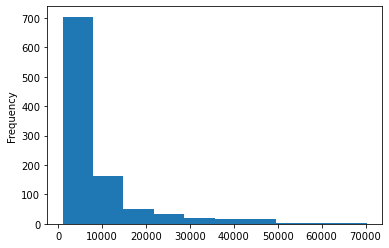

In [14]:
df['MonthlyIncome'].plot(kind='hist')
plt.show()

In [15]:
i = 0
df['MonthlyIncomeBin'] = df['MonthlyIncome'].astype(str)
for record in df['MonthlyIncomeBin']:
    if df.at[i, 'MonthlyIncome'] < 10000:
        df.at[i, 'MonthlyIncomeBin'] = 'low_Inc'
    elif df.at[i,'MonthlyIncome'] < 30000 and df.at[i,'MonthlyIncome'] >= 10000 :
        df.at[i,'MonthlyIncomeBin'] = 'medium_Inc'
    elif df.at[i,'MonthlyIncome'] >= 30000:
        df.at[i,'MonthlyIncomeBin'] = 'high_Inc'
    i += 1
    
df['MonthlyIncomeBin']

0          low_Inc
1          low_Inc
2          low_Inc
3          low_Inc
4       medium_Inc
           ...    
1008       low_Inc
1009       low_Inc
1010       low_Inc
1011       low_Inc
1012       low_Inc
Name: MonthlyIncomeBin, Length: 1013, dtype: object

In [16]:
i = 0
df['NumCompaniesWorkedBin'] = df['NumCompaniesWorked'].astype(str)
for record in df['NumCompaniesWorkedBin']:
    if df.at[i, 'NumCompaniesWorked'] == 0:
        df.at[i, 'NumCompaniesWorkedBin'] = 'none_Comp'
    elif df.at[i,'NumCompaniesWorked'] <= 4 and df.at[i,'NumCompaniesWorked'] >= 1:
        df.at[i,'NumCompaniesWorkedBin'] = 'some_Comp'
    elif df.at[i,'NumCompaniesWorked'] >= 5:
        df.at[i,'NumCompaniesWorkedBin'] = 'many_Comp'
    i += 1
    
df['NumCompaniesWorkedBin']

0       many_Comp
1       some_Comp
2       many_Comp
3       some_Comp
4       some_Comp
          ...    
1008    none_Comp
1009    none_Comp
1010    none_Comp
1011    some_Comp
1012    none_Comp
Name: NumCompaniesWorkedBin, Length: 1013, dtype: object

In [17]:
df['OverTimeCat'] = df['OverTime'].map(
    {0: 'No_OT', 1: 'Yes_OT'}).astype(str)

df['OverTimeCat']

0        No_OT
1       Yes_OT
2        No_OT
3       Yes_OT
4        No_OT
         ...  
1008     No_OT
1009    Yes_OT
1010     No_OT
1011     No_OT
1012     No_OT
Name: OverTimeCat, Length: 1013, dtype: object

In [18]:
set(df['PercentSalaryHike'])

{11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}

In [19]:
df['PercentSalaryHike'].median()

14.0

In [20]:
i = 0
df['PercentSalaryHikeBin'] = df['PercentSalaryHike'].astype(str)
for record in df['PercentSalaryHikeBin']:
    if df.at[i, 'PercentSalaryHike'] <= 14:
        df.at[i, 'PercentSalaryHikeBin'] = 'low_PSH'
    elif df.at[i,'PercentSalaryHike'] >= 15:
        df.at[i,'PercentSalaryHikeBin'] = 'high_PSH'
    i += 1
    
df['PercentSalaryHikeBin']

0        low_PSH
1        low_PSH
2       high_PSH
3        low_PSH
4       high_PSH
          ...   
1008    high_PSH
1009     low_PSH
1010     low_PSH
1011     low_PSH
1012    high_PSH
Name: PercentSalaryHikeBin, Length: 1013, dtype: object

In [21]:
df['RelationshipSatisfactionCat'] = df['RelationshipSatisfaction'].map(
    {1: 'Low_RelSat', 2: 'Medium_RelSat', 3: 'High_RelSat', 4:'Very High_RelSat'}).astype(str)

df['RelationshipSatisfactionCat']

0       Very High_RelSat
1       Very High_RelSat
2             Low_RelSat
3       Very High_RelSat
4            High_RelSat
              ...       
1008          Low_RelSat
1009       Medium_RelSat
1010         High_RelSat
1011       Medium_RelSat
1012    Very High_RelSat
Name: RelationshipSatisfactionCat, Length: 1013, dtype: object

In [22]:
set(df['StockOptionLevel'])

{0, 1, 2, 3}

In [23]:
df['StockOptionLevelCat'] = df['StockOptionLevel'].map(
    {0: '0_StockLevel', 1: '1_StockLevelRelSat', 2: '2_StockLevelRelSat', 3:'3_StockLevelRelSat'}).astype(str)

df['StockOptionLevelCat']

0             0_StockLevel
1       1_StockLevelRelSat
2             0_StockLevel
3             0_StockLevel
4             0_StockLevel
               ...        
1008    1_StockLevelRelSat
1009          0_StockLevel
1010          0_StockLevel
1011          0_StockLevel
1012          0_StockLevel
Name: StockOptionLevelCat, Length: 1013, dtype: object

In [24]:
i = 0
df['TotalWorkingYearsBin'] = df['TotalWorkingYears'].astype(str)
for record in df['TotalWorkingYearsBin']:
    if df.at[i, 'TotalWorkingYears'] < 10:
        df.at[i, 'TotalWorkingYearsBin'] = 'less 10 years_TWY'
    elif df.at[i,'TotalWorkingYears'] >= 10 and df.at[i,'TotalWorkingYears'] <20:
        df.at[i,'TotalWorkingYearsBin'] = '10-20 years_TWY'
    elif df.at[i,'TotalWorkingYears'] >= 20:
        df.at[i,'TotalWorkingYearsBin'] = 'more 20 years_TWY'
    i += 1
    
df['TotalWorkingYearsBin']

0         10-20 years_TWY
1         10-20 years_TWY
2         10-20 years_TWY
3       less 10 years_TWY
4       more 20 years_TWY
              ...        
1008    less 10 years_TWY
1009    less 10 years_TWY
1010    less 10 years_TWY
1011    less 10 years_TWY
1012    less 10 years_TWY
Name: TotalWorkingYearsBin, Length: 1013, dtype: object

In [25]:
set(df['TrainingTimesLastYear'])

{0, 1, 2, 3, 4, 5, 6}

In [26]:
i = 0
df['TrainingTimesLastYearBin'] = df['TrainingTimesLastYear'].astype(str)
for record in df['TrainingTimesLastYearBin']:
    if df.at[i, 'TrainingTimesLastYear'] == 0:
        df.at[i, 'TrainingTimesLastYearBin'] = 'no_TrainTimesLY'
    elif df.at[i,'TrainingTimesLastYear'] > 0 and df.at[i,'TrainingTimesLastYear'] < 7:
        df.at[i,'TrainingTimesLastYearBin'] = 'yes_TrainTimesLY'
    i += 1
    
df['TrainingTimesLastYearBin']

0       yes_TrainTimesLY
1       yes_TrainTimesLY
2       yes_TrainTimesLY
3       yes_TrainTimesLY
4       yes_TrainTimesLY
              ...       
1008    yes_TrainTimesLY
1009    yes_TrainTimesLY
1010    yes_TrainTimesLY
1011    yes_TrainTimesLY
1012    yes_TrainTimesLY
Name: TrainingTimesLastYearBin, Length: 1013, dtype: object

In [27]:
set(df['WorkLifeBalance'])

{1, 2, 3, 4}

In [28]:
df['WorkLifeBalanceCat'] = df['WorkLifeBalance'].map(
    {1: 'Bad_WorkLifeBal', 2: 'Good_WorkLifeBal', 3: 'Better_WorkLifeBal', 4:'Best_WorkLifeBal'}).astype(str)

df['WorkLifeBalanceCat']

0         Good_WorkLifeBal
1       Better_WorkLifeBal
2          Bad_WorkLifeBal
3         Good_WorkLifeBal
4         Good_WorkLifeBal
               ...        
1008    Better_WorkLifeBal
1009    Better_WorkLifeBal
1010      Best_WorkLifeBal
1011    Better_WorkLifeBal
1012    Better_WorkLifeBal
Name: WorkLifeBalanceCat, Length: 1013, dtype: object

In [29]:
i = 0
df['YearsAtCompanyBin'] = df['YearsAtCompany'].astype(str)
for record in df['YearsAtCompanyBin']:
    if df.at[i, 'YearsAtCompany'] <= 10:
        df.at[i, 'YearsAtCompanyBin'] = 'less 10 years_YAT'
    elif df.at[i,'YearsAtCompany'] > 10:
        df.at[i,'YearsAtCompanyBin'] = 'more 11 years_YAT'
    i += 1
    
df['YearsAtCompanyBin']

0       less 10 years_YAT
1       less 10 years_YAT
2       less 10 years_YAT
3       less 10 years_YAT
4       less 10 years_YAT
              ...        
1008    less 10 years_YAT
1009    less 10 years_YAT
1010    less 10 years_YAT
1011    less 10 years_YAT
1012    less 10 years_YAT
Name: YearsAtCompanyBin, Length: 1013, dtype: object

In [30]:
i = 0
df['YearsWithCurrManagerBin'] = df['YearsWithCurrManager'].astype(str)
for record in df['YearsWithCurrManagerBin']:
    if df.at[i, 'YearsWithCurrManager'] <= 3:
        df.at[i, 'YearsWithCurrManagerBin'] = '0-3 years_YWCM'
    elif df.at[i,'YearsWithCurrManager'] > 3 and df.at[i,'YearsWithCurrManager'] <= 9:
        df.at[i,'YearsWithCurrManagerBin'] = '4-9 years_YWCM'
    elif df.at[i,'YearsWithCurrManager'] > 9:
         df.at[i,'YearsWithCurrManagerBin'] = 'more 9 years_YWCM'
    i += 1
    
df['YearsWithCurrManagerBin']

0       0-3 years_YWCM
1       4-9 years_YWCM
2       0-3 years_YWCM
3       0-3 years_YWCM
4       4-9 years_YWCM
             ...      
1008    0-3 years_YWCM
1009    0-3 years_YWCM
1010    0-3 years_YWCM
1011    0-3 years_YWCM
1012    0-3 years_YWCM
Name: YearsWithCurrManagerBin, Length: 1013, dtype: object

In [31]:
i = 0
df['StagnationBin'] = df['Stagnation'].astype(str)
for record in df['StagnationBin']:
    if df.at[i, 'Stagnation'] < 20:
        df.at[i, 'StagnationBin'] = 'low_Stag'
    elif df.at[i,'Stagnation'] >= 20 and df.at[i,'Stagnation'] <= 50:
        df.at[i,'StagnationBin'] = 'medium_Stag'
    elif df.at[i,'Stagnation'] > 50:
         df.at[i,'StagnationBin'] = 'high_Stag'
    i += 1
    
df['StagnationBin']

0          low_Stag
1          low_Stag
2          low_Stag
3          low_Stag
4       medium_Stag
           ...     
1008       low_Stag
1009       low_Stag
1010       low_Stag
1011       low_Stag
1012       low_Stag
Name: StagnationBin, Length: 1013, dtype: object

In [32]:
df_pattern = df.drop(columns=['Age', 'Attrition', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobSatisfaction',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsWithCurrManager', 'Stagnation'])

In [33]:
df_pattern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   BusinessTravel               1013 non-null   object
 1   Department                   1013 non-null   object
 2   EducationField               1013 non-null   object
 3   JobRole                      1013 non-null   object
 4   MaritalStatus                1013 non-null   object
 5   AgeBin                       1013 non-null   object
 6   AttritionCat                 1013 non-null   object
 7   DistanceFromHomeBin          1013 non-null   object
 8   EducationCat                 1013 non-null   object
 9   EnvironmentSatisfactionCat   1013 non-null   object
 10  GenderCat                    1013 non-null   object
 11  JobInvolvementCat            1013 non-null   object
 12  JobSatisfactionCat           1013 non-null   object
 13  MonthlyIncomeBin             1013

Consideriamo solo valori del df e li mettiamo in una lista

In [34]:
baskets = df.values.tolist()

In [35]:
baskets[0]

[37,
 0,
 'Travel_Rarely',
 'Research & Development',
 4,
 3,
 'Medical',
 4,
 1,
 3,
 'Healthcare Representative',
 2,
 'Single',
 3452,
 9,
 0,
 12,
 4,
 0,
 10,
 3,
 2,
 5,
 3,
 4,
 '[28.0, 38.0)_Age',
 'No_Attr',
 'near_Dist',
 'Bachelor',
 'Very High_Sat',
 'Female',
 'High_JobInv',
 'Medium_JobSat',
 'low_Inc',
 'many_Comp',
 'No_OT',
 'low_PSH',
 'Very High_RelSat',
 '0_StockLevel',
 '10-20 years_TWY',
 'yes_TrainTimesLY',
 'Good_WorkLifeBal',
 'less 10 years_YAT',
 '0-3 years_YWCM',
 'low_Stag']

## Itemsets più frequenti

In [36]:
from fim import apriori

In [100]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

In [109]:
supp_gridsearch = [30,40,50,60,70,80,90]
zmin_gridsearch = [2,3,4,5,6,7,8,9,10,11]
type_gridsearch = ['a', 'c', 'm']
results_apriori = list()

def report(lista):
    for item in lista:
        if item[3] == 0:
            continue
        else:
            print()
            print("Support:" + str(item[0]))
            print("Zmin:" + str(item[1]))
            if item[2] == 'a':
                print("Type: frequent itemsets")
            elif item[2] == 'c':
                print("Type: closed itemsets")
            elif item[2] == 'm':
                print("Type: maximal itemsets")
            print("Regole:" + str(item[3]))
            print()

In [110]:
# calcoliamo gli itemsets più frequenti
for i in range(len(supp_gridsearch)):
    for j in range(len(zmin_gridsearch)):
        for k in range(len(type_gridsearch)):
            itemsets = apriori(baskets, supp=supp_gridsearch[i], zmin=zmin_gridsearch[j], target=type_gridsearch[k])
            if len(itemsets) < 100:
                results_apriori.append(tuple((supp_gridsearch[i], zmin_gridsearch[j], type_gridsearch[k], len(itemsets))))

In [111]:
report(results_apriori)


Support:30
Zmin:10
Type: frequent itemsets
Regole:75


Support:30
Zmin:10
Type: closed itemsets
Regole:72


Support:30
Zmin:10
Type: maximal itemsets
Regole:44


Support:30
Zmin:11
Type: frequent itemsets
Regole:3


Support:30
Zmin:11
Type: closed itemsets
Regole:3


Support:30
Zmin:11
Type: maximal itemsets
Regole:3


Support:40
Zmin:8
Type: maximal itemsets
Regole:89


Support:40
Zmin:9
Type: frequent itemsets
Regole:40


Support:40
Zmin:9
Type: closed itemsets
Regole:39


Support:40
Zmin:9
Type: maximal itemsets
Regole:30


Support:40
Zmin:10
Type: frequent itemsets
Regole:1


Support:40
Zmin:10
Type: closed itemsets
Regole:1


Support:40
Zmin:10
Type: maximal itemsets
Regole:1


Support:50
Zmin:7
Type: maximal itemsets
Regole:60


Support:50
Zmin:8
Type: frequent itemsets
Regole:27


Support:50
Zmin:8
Type: closed itemsets
Regole:26


Support:50
Zmin:8
Type: maximal itemsets
Regole:10


Support:50
Zmin:9
Type: frequent itemsets
Regole:2


Support:50
Zmin:9
Type: closed itemsets
Re

## Association rules

In [97]:
conf_gridsearch = [60,70,80,90]
results_rules = list()
def report_regole(lista):
    for item in lista:
        print()
        print("Target:" + str(item[0]))
        print("Support:" + str(item[1]))
        print("Zmin:" + str(item[2]))
        print("Confidence" + str(item[3]))
        print()

In [98]:
for i in range(len(supp_gridsearch)):
    for j in range(len(zmin_gridsearch)):
        for k in range(len(conf_gridsearch)):
            rules = apriori(baskets, supp=supp_gridsearch[i], zmin=zmin_gridsearch[j], target='r', conf=conf_gridsearch[k], 
                report='ascl')
            for r in rules:
                if r[0] == 'No_Attr' or r[0] == 'Yes_Attr':
                    results_rules.append(tuple((r, supp_gridsearch[i],zmin_gridsearch[j],conf_gridsearch[k])))

In [99]:
report_regole(results_rules)


Support:('No_Attr', ('Very High_JobSat', 4), 272, 0.26850937808489633, 0.8947368421052632, 1.0751701317350315)
Zmin:30
Regole:2


Support:('No_Attr', ('Very High_JobSat',), 272, 0.26850937808489633, 0.8947368421052632, 1.0751701317350315)
Zmin:30
Regole:2


Support:('No_Attr', ('Very High_RelSat', 4, 0), 264, 0.26061204343534056, 0.8627450980392157, 1.0367269090317028)
Zmin:30
Regole:2


Support:('No_Attr', ('Very High_RelSat', 4), 264, 0.26061204343534056, 0.8599348534201955, 1.0333499484159643)
Zmin:30
Regole:2


Support:('No_Attr', ('Very High_RelSat', 0), 264, 0.26061204343534056, 0.8627450980392157, 1.0367269090317028)
Zmin:30
Regole:2


Support:('No_Attr', ('Very High_RelSat',), 264, 0.26061204343534056, 0.8599348534201955, 1.0333499484159643)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobSat', 3, 0), 257, 0.25370187561697927, 0.8263665594855305, 0.99301224763801)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobSat', 3), 257, 0.25370187561697927, 0.8210862619808307, 0.986667

Zmin:30
Regole:2


Support:('No_Attr', ('1_StockLevelRelSat', 'low_Stag', 2, 1, 'less 10 years_YAT', 3), 276, 0.2724580454096742, 0.8903225806451613, 1.0698656870623349)
Zmin:30
Regole:2


Support:('No_Attr', ('1_StockLevelRelSat', 'low_Stag', 2, 1, 'less 10 years_YAT', 0), 281, 0.2773938795656466, 0.8949044585987261, 1.075371549893843)
Zmin:30
Regole:2


Support:('No_Attr', ('1_StockLevelRelSat', 'low_Stag', 2, 1, 'less 10 years_YAT'), 281, 0.2773938795656466, 0.8892405063291139, 1.0685654008438819)
Zmin:30
Regole:2


Support:('No_Attr', ('1_StockLevelRelSat', 'low_Stag', 2, 1, 'yes_TrainTimesLY', 3, 0), 278, 0.2744323790720632, 0.896774193548387, 1.077618336968584)
Zmin:30
Regole:2


Support:('No_Attr', ('1_StockLevelRelSat', 'low_Stag', 2, 1, 'yes_TrainTimesLY', 3), 278, 0.2744323790720632, 0.8910256410256411, 1.0707105271162212)
Zmin:30
Regole:2


Support:('No_Attr', ('1_StockLevelRelSat', 'low_Stag', 2, 1, 'yes_TrainTimesLY', 0), 283, 0.2793682132280355, 0.8955696202531646, 1.0761



Support:('No_Attr', ('Life Sciences', 4, 1, 'less 10 years_YAT', 3), 277, 0.2734452122408687, 0.8419452887537994, 1.0117325949081837)
Zmin:30
Regole:2


Support:('No_Attr', ('Life Sciences', 4, 1, 'less 10 years_YAT', 0), 282, 0.2783810463968411, 0.844311377245509, 1.014575830545315)
Zmin:30
Regole:2


Support:('No_Attr', ('Life Sciences', 4, 1, 'less 10 years_YAT'), 282, 0.2783810463968411, 0.8417910447761194, 1.0115472459765231)
Zmin:30
Regole:2


Support:('No_Attr', ('Life Sciences', 4, 1, 'yes_TrainTimesLY', 3, 0), 274, 0.2704837117472853, 0.8379204892966361, 1.0068961514323753)
Zmin:30
Regole:2


Support:('No_Attr', ('Life Sciences', 4, 1, 'yes_TrainTimesLY', 3), 274, 0.2704837117472853, 0.8353658536585366, 1.0038263460926424)
Zmin:30
Regole:2


Support:('No_Attr', ('Life Sciences', 4, 1, 'yes_TrainTimesLY', 0), 278, 0.2744323790720632, 0.8373493975903614, 1.0062098929525933)
Zmin:30
Regole:2


Support:('No_Attr', ('Life Sciences', 4, 1, 'yes_TrainTimesLY'), 278, 0.2744323790720

Regole:2


Support:('No_Attr', ('0_StockLevel', 'low_Stag', 2, 1), 226, 0.22309970384995065, 0.6932515337423313, 0.8330531479015203)
Zmin:30
Regole:2


Support:('No_Attr', ('0_StockLevel', 'low_Stag', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 250, 0.24679170779861798, 0.7225433526011561, 0.8682519764946276)
Zmin:30
Regole:2


Support:('No_Attr', ('0_StockLevel', 'low_Stag', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 250, 0.24679170779861798, 0.7225433526011561, 0.8682519764946276)
Zmin:30
Regole:2


Support:('No_Attr', ('0_StockLevel', 'low_Stag', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 253, 0.24975320829220138, 0.71875, 0.8636936536180309)
Zmin:30
Regole:2


Support:('No_Attr', ('0_StockLevel', 'low_Stag', 2, 'less 10 years_YAT', 'yes_TrainTimesLY'), 253, 0.24975320829220138, 0.71875, 0.8636936536180309)
Zmin:30
Regole:2


Support:('No_Attr', ('0_StockLevel', 'low_Stag', 2, 'less 10 years_YAT', 3, 0), 260, 0.25666337611056267, 0.7282913165266106, 0.87515907905273

Regole:2


Support:('No_Attr', ('high_PSH', 4, 2, 'less 10 years_YAT', 0), 290, 0.28627838104639686, 0.8169014084507042, 0.9816383472841795)
Zmin:30
Regole:2


Support:('No_Attr', ('high_PSH', 4, 2, 'less 10 years_YAT'), 290, 0.28627838104639686, 0.8146067415730337, 0.9788809361963027)
Zmin:30
Regole:2


Support:('No_Attr', ('high_PSH', 4, 2, 'yes_TrainTimesLY', 3, 0), 285, 0.2813425468904245, 0.8189655172413793, 0.9841187057716694)
Zmin:30
Regole:2


Support:('No_Attr', ('high_PSH', 4, 2, 'yes_TrainTimesLY', 3), 285, 0.2813425468904245, 0.8166189111747851, 0.9812988813998307)
Zmin:30
Regole:2


Support:('No_Attr', ('high_PSH', 4, 2, 'yes_TrainTimesLY', 0), 292, 0.2882527147087858, 0.8202247191011236, 0.985631839204553)
Zmin:30
Regole:2


Support:('No_Attr', ('high_PSH', 4, 2, 'yes_TrainTimesLY'), 292, 0.2882527147087858, 0.8179271708683473, 0.9828709657053806)
Zmin:30
Regole:2


Support:('No_Attr', ('high_PSH', 4, 2, 3, 0), 292, 0.2882527147087858, 0.8179271708683473, 0.98287096570538

Regole:2


Support:('No_Attr', ('Married', 'Travel_Rarely', 1, 'less 10 years_YAT'), 288, 0.2843040473840079, 0.8597014925373134, 1.0330695278058108)
Zmin:30
Regole:2


Support:('No_Attr', ('Married', 'Travel_Rarely', 1, 'yes_TrainTimesLY', 3, 0), 290, 0.28627838104639686, 0.8682634730538922, 1.0433581236104303)
Zmin:30
Regole:2


Support:('No_Attr', ('Married', 'Travel_Rarely', 1, 'yes_TrainTimesLY', 3), 290, 0.28627838104639686, 0.8605341246290801, 1.034070069097578)
Zmin:30
Regole:2


Support:('No_Attr', ('Married', 'Travel_Rarely', 1, 'yes_TrainTimesLY', 0), 297, 0.29318854886475815, 0.868421052631579, 1.0435474808016483)
Zmin:30
Regole:2


Support:('No_Attr', ('Married', 'Travel_Rarely', 1, 'yes_TrainTimesLY'), 297, 0.29318854886475815, 0.8608695652173913, 1.034473154881634)
Zmin:30
Regole:2


Support:('No_Attr', ('Married', 'Travel_Rarely', 1, 3, 0), 293, 0.28923988153998026, 0.8668639053254438, 1.041676318024525)
Zmin:30
Regole:2


Support:('No_Attr', ('Married', 'Travel_Rarely'



Support:('No_Attr', ('some_Comp', 'No_OT', 2, 1, 3, 0), 280, 0.2764067127344521, 0.9210526315789473, 1.1067927826684147)
Zmin:30
Regole:2


Support:('No_Attr', ('some_Comp', 'No_OT', 2, 1, 3), 280, 0.2764067127344521, 0.9210526315789473, 1.1067927826684147)
Zmin:30
Regole:2


Support:('No_Attr', ('some_Comp', 'No_OT', 2, 1, 0), 284, 0.28035538005923, 0.922077922077922, 1.1080248340034817)
Zmin:30
Regole:2


Support:('No_Attr', ('some_Comp', 'No_OT', 2, 1), 284, 0.28035538005923, 0.922077922077922, 1.1080248340034817)
Zmin:30
Regole:2


Support:('No_Attr', ('some_Comp', 'No_OT', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 285, 0.2813425468904245, 0.9253246753246753, 1.11192632989786)
Zmin:30
Regole:2


Support:('No_Attr', ('some_Comp', 'No_OT', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 285, 0.2813425468904245, 0.9253246753246753, 1.11192632989786)
Zmin:30
Regole:2


Support:('No_Attr', ('some_Comp', 'No_OT', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 289, 0.285291214

Zmin:30
Regole:2


Support:('No_Attr', ('some_Comp', 4, 'low_Stag', 2, 1, 'yes_TrainTimesLY'), 271, 0.2675222112537019, 0.8685897435897436, 1.0437501901025033)
Zmin:30
Regole:2


Support:('No_Attr', ('some_Comp', 4, 'low_Stag', 2, 1, 3, 0), 277, 0.2734452122408687, 0.8765822784810127, 1.0533545054582039)
Zmin:30
Regole:2


Support:('No_Attr', ('some_Comp', 4, 'low_Stag', 2, 1, 3), 277, 0.2734452122408687, 0.8738170347003155, 1.0500316205829414)
Zmin:30
Regole:2


Support:('No_Attr', ('some_Comp', 4, 'low_Stag', 2, 1, 0), 280, 0.2764067127344521, 0.8722741433021807, 1.0481775885707105)
Zmin:30
Regole:2


Support:('No_Attr', ('some_Comp', 4, 'low_Stag', 2, 1), 280, 0.2764067127344521, 0.8695652173913043, 1.044922378668317)
Zmin:30
Regole:2


Support:('No_Attr', ('some_Comp', 4, 'low_Stag', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 282, 0.2783810463968411, 0.88125, 1.0589635231316725)
Zmin:30
Regole:2


Support:('No_Attr', ('some_Comp', 4, 'low_Stag', 2, 'less 10 years_YAT', 'yes

Regole:2


Support:('No_Attr', ('low_PSH', 'near_Dist', 4, 0), 272, 0.26850937808489633, 0.8690095846645367, 1.044254696637219)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 'near_Dist', 4), 272, 0.26850937808489633, 0.8662420382165605, 1.0409290447371007)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 'near_Dist', 'low_Stag', 'less 10 years_YAT', 0), 255, 0.25172754195459035, 0.8360655737704918, 1.0046671722769966)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 'near_Dist', 'low_Stag', 'less 10 years_YAT'), 255, 0.25172754195459035, 0.8306188925081434, 0.9981221092654201)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 'near_Dist', 'low_Stag', 'yes_TrainTimesLY'), 250, 0.24679170779861798, 0.8223684210526315, 0.9882078416682275)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 'near_Dist', 'low_Stag', 3, 0), 258, 0.25468904244817375, 0.8349514563106796, 1.0033283810708404)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 'near_Dist', 'low_Stag', 3), 258, 0.25468904



Support:('No_Attr', ('low_PSH', '0-3 years_YWCM', 4, 2, 'less 10 years_YAT', 3, 0), 276, 0.2724580454096742, 0.8544891640866873, 1.0268060773663277)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', '0-3 years_YWCM', 4, 2, 'less 10 years_YAT', 3), 276, 0.2724580454096742, 0.8518518518518519, 1.0236369228065552)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', '0-3 years_YWCM', 4, 2, 'less 10 years_YAT', 0), 279, 0.2754195459032576, 0.8532110091743119, 1.02527016879428)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', '0-3 years_YWCM', 4, 2, 'less 10 years_YAT'), 279, 0.2754195459032576, 0.850609756097561, 1.0221443451089316)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', '0-3 years_YWCM', 4, 2, 'yes_TrainTimesLY', 3, 0), 270, 0.2665350444225074, 0.8490566037735849, 1.0202779829450077)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', '0-3 years_YWCM', 4, 2, 'yes_TrainTimesLY', 3), 270, 0.2665350444225074, 0.8463949843260188, 1.0170796193621081)
Zmin:30
Regole:2


Support:('

Support:('No_Attr', ('low_PSH', 'Travel_Rarely', 1, 'less 10 years_YAT'), 324, 0.3198420533070089, 0.8459530026109661, 1.016548507289334)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 'Travel_Rarely', 1, 'yes_TrainTimesLY', 3, 0), 321, 0.3168805528134255, 0.84251968503937, 1.0124228243711528)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 'Travel_Rarely', 1, 'yes_TrainTimesLY', 3), 321, 0.3168805528134255, 0.8381201044386423, 1.0071360211107292)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 'Travel_Rarely', 1, 'yes_TrainTimesLY', 0), 325, 0.32082922013820336, 0.8441558441558441, 1.0143889325383988)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 'Travel_Rarely', 1, 'yes_TrainTimesLY'), 325, 0.32082922013820336, 0.8397932816537468, 1.0091466124736008)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 'Travel_Rarely', 1, 3, 0), 330, 0.32576505429417574, 0.8461538461538461, 1.0167898530887856)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 'Travel_Rarely', 1, 3), 330



Support:('No_Attr', ('low_PSH', 4, 'yes_TrainTimesLY', 3, 0), 396, 0.39091806515301086, 0.8590021691973969, 1.0322291784068365)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 4, 'yes_TrainTimesLY', 3), 396, 0.39091806515301086, 0.8571428571428571, 1.0299949161159125)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 4, 'yes_TrainTimesLY', 0), 400, 0.39486673247778875, 0.8583690987124464, 1.0314684424622873)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 4, 'yes_TrainTimesLY'), 400, 0.39486673247778875, 0.8565310492505354, 1.0292597305940596)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 4, 3, 0), 414, 0.40868706811451133, 0.8643006263048016, 1.038596126271369)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 4, 3), 414, 0.40868706811451133, 0.8625, 1.036432384341637)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 4, 0), 419, 0.4136229022704837, 0.8639175257731959, 1.0381357694048012)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 4), 419, 0.4136229022704837, 0



Support:('No_Attr', ('less 10 years_TWY', 'Better_WorkLifeBal', 'low_Stag', 2, 'yes_TrainTimesLY', 0), 249, 0.2458045409674235, 0.7929936305732485, 0.952909309336537)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Better_WorkLifeBal', 'low_Stag', 2, 'yes_TrainTimesLY'), 249, 0.2458045409674235, 0.7904761904761904, 0.9498842004180083)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Better_WorkLifeBal', 'low_Stag', 2, 3, 0), 258, 0.25468904244817375, 0.7987616099071208, 0.9598404636250455)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Better_WorkLifeBal', 'low_Stag', 2, 3), 258, 0.25468904244817375, 0.7962962962962963, 0.9568779930583015)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Better_WorkLifeBal', 'low_Stag', 2, 0), 258, 0.25468904244817375, 0.7987616099071208, 0.9598404636250455)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Better_WorkLifeBal', 'low_Stag', 2), 258, 0.25468904244817375, 0.7962962962962

Support:('No_Attr', ('less 10 years_TWY', 'Research & Development', 4, 1, 'less 10 years_YAT'), 245, 0.2418558736426456, 0.805921052631579, 0.968443684834863)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Research & Development', 4, 1), 245, 0.2418558736426456, 0.805921052631579, 0.968443684834863)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Research & Development', 4, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 250, 0.24679170779861798, 0.819672131147541, 0.9849678159578399)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Research & Development', 4, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 250, 0.24679170779861798, 0.8169934640522876, 0.9817489668860823)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Research & Development', 4, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 255, 0.25172754195459035, 0.8173076923076923, 0.9821265626425769)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Research & Develo

Support:('No_Attr', ('less 10 years_TWY', 'No_OT', 4, 'yes_TrainTimesLY'), 292, 0.2882527147087858, 0.8821752265861027, 1.0600753315916038)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'No_OT', 4, 3, 0), 300, 0.29615004935834155, 0.8823529411764706, 1.0602888842369689)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'No_OT', 4, 3), 300, 0.29615004935834155, 0.8823529411764706, 1.0602888842369689)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'No_OT', 4, 0), 305, 0.3010858835143139, 0.8840579710144928, 1.0623377516461223)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'No_OT', 4), 305, 0.3010858835143139, 0.8840579710144928, 1.0623377516461223)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'No_OT', 'low_Stag', 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 276, 0.2724580454096742, 0.8492307692307692, 1.020487270736381)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'No_OT', 'low_Stag', 2, 1, 'l

Regole:2


Support:('No_Attr', ('less 10 years_TWY', '0-3 years_YWCM', 'low_Inc', 4, 1, 'less 10 years_YAT', 3, 0), 238, 0.2349457058242843, 0.780327868852459, 0.9376893607918636)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', '0-3 years_YWCM', 'low_Inc', 4, 1, 'less 10 years_YAT', 3), 238, 0.2349457058242843, 0.780327868852459, 0.9376893607918636)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', '0-3 years_YWCM', 'low_Inc', 4, 1, 'less 10 years_YAT', 0), 242, 0.2388943731490622, 0.7781350482315113, 0.9350543343517448)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', '0-3 years_YWCM', 'low_Inc', 4, 1, 'less 10 years_YAT'), 242, 0.2388943731490622, 0.7781350482315113, 0.9350543343517448)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', '0-3 years_YWCM', 'low_Inc', 4, 1, 3, 0), 238, 0.2349457058242843, 0.780327868852459, 0.9376893607918636)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', '0-3 years_YWCM', 'low_Inc', 4, 1, 3),

Regole:2


Support:('No_Attr', ('less 10 years_TWY', '0-3 years_YWCM', 'low_Stag', 1, 0), 353, 0.3484698914116486, 0.7542735042735043, 0.9063808538897506)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', '0-3 years_YWCM', 'low_Stag', 1), 353, 0.3484698914116486, 0.7510638297872341, 0.9025239140859646)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', '0-3 years_YWCM', 'low_Stag', 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 359, 0.3543928923988154, 0.7654584221748401, 0.9198213305612254)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', '0-3 years_YWCM', 'low_Stag', 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 359, 0.3543928923988154, 0.7622080679405521, 0.9159155075015174)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', '0-3 years_YWCM', 'low_Stag', 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 364, 0.35932872655478776, 0.7631027253668763, 0.9169905822024267)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', '0-3 years_YWCM',

Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Travel_Rarely', 2, 'yes_TrainTimesLY'), 304, 0.30009871668311944, 0.7794871794871795, 0.9366791373908812)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Travel_Rarely', 2, 3, 0), 306, 0.3020730503455084, 0.7846153846153846, 0.9428415001368738)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Travel_Rarely', 2, 3), 306, 0.3020730503455084, 0.7806122448979592, 0.9380310843198489)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Travel_Rarely', 2, 0), 313, 0.3089832181638697, 0.7844611528822055, 0.9426561659189492)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Travel_Rarely', 2), 313, 0.3089832181638697, 0.7805486284289277, 0.9379546389068846)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Travel_Rarely', 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 299, 0.29516288252714706, 0.772609819121447, 0.9284148834757128)
Zmin:30
Regole:2


Support:('No_Attr', ('less 

Support:('No_Attr', ('less 10 years_TWY', 4, 'low_Stag', 1, 3), 352, 0.3474827245804541, 0.7839643652561247, 0.9420591957348213)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 4, 'low_Stag', 1, 0), 359, 0.3543928923988154, 0.7855579868708972, 0.9439741882564874)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 4, 'low_Stag', 1), 359, 0.3543928923988154, 0.7838427947598253, 0.9419131092428269)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 4, 'low_Stag', 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 366, 0.36130306021717673, 0.7956521739130434, 0.9561039764815101)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 4, 'low_Stag', 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 366, 0.36130306021717673, 0.7939262472885033, 0.9540299982245003)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 4, 'low_Stag', 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 372, 0.36722606120434353, 0.7948717948717948, 0.9551662256288591)
Zmin:30
Regole

Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'Better_WorkLifeBal', 3), 289, 0.28529121421520237, 0.8601190476190477, 1.033571287352426)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'Better_WorkLifeBal', 0), 289, 0.28529121421520237, 0.8626865671641791, 1.0366565747773588)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'Better_WorkLifeBal'), 289, 0.28529121421520237, 0.8601190476190477, 1.033571287352426)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'near_Dist', 4, 2, 0), 262, 0.25863770977295164, 0.8534201954397395, 1.0255215397158435)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'near_Dist', 4, 2), 262, 0.25863770977295164, 0.8534201954397395, 1.0255215397158435)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'near_Dist', 4, 1, 0), 265, 0.26159921026653504, 0.8548387096774194, 1.0272261125779665)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'near_Dist', 4, 1), 265, 0.26159921026653504, 0.85483

Support:('No_Attr', ('[28.0, 38.0)_Age', 'No_OT', 1, 'less 10 years_YAT'), 325, 0.32082922013820336, 0.885558583106267, 1.064140978275977)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'No_OT', 1, 'yes_TrainTimesLY', 3, 0), 323, 0.3188548864758144, 0.8898071625344353, 1.0692463293563261)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'No_OT', 1, 'yes_TrainTimesLY', 3), 323, 0.3188548864758144, 0.8898071625344353, 1.0692463293563261)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'No_OT', 1, 'yes_TrainTimesLY', 0), 330, 0.32576505429417574, 0.8870967741935484, 1.0659893621092105)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'No_OT', 1, 'yes_TrainTimesLY'), 330, 0.32576505429417574, 0.8870967741935484, 1.0659893621092105)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'No_OT', 1, 3, 0), 331, 0.32675222112537017, 0.8897849462365591, 1.0692196329034809)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'No_OT', 1

Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', '0-3 years_YWCM', 1, 'yes_TrainTimesLY', 3), 305, 0.3010858835143139, 0.8090185676392573, 0.9721658469971146)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', '0-3 years_YWCM', 1, 'yes_TrainTimesLY', 0), 310, 0.3060217176702863, 0.8051948051948052, 0.9675709818058572)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', '0-3 years_YWCM', 1, 'yes_TrainTimesLY'), 310, 0.3060217176702863, 0.8031088082901554, 0.9650643212312306)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', '0-3 years_YWCM', 1, 3, 0), 312, 0.3079960513326752, 0.8125, 0.9763493475682088)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', '0-3 years_YWCM', 1, 3), 312, 0.3079960513326752, 0.8103896103896104, 0.9738133752368627)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', '0-3 years_YWCM', 1, 0), 318, 0.3139190523198421, 0.8071065989847716, 0.9698683093375725)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0

Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'low_Inc', 'low_Stag', 2, 1, 'less 10 years_YAT', 3), 272, 0.26850937808489633, 0.8, 0.9613285883748517)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'low_Inc', 'low_Stag', 2, 1, 'less 10 years_YAT', 0), 278, 0.2744323790720632, 0.7988505747126436, 0.959947369138681)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'low_Inc', 'low_Stag', 2, 1, 'less 10 years_YAT'), 278, 0.2744323790720632, 0.7942857142857143, 0.9544619556007456)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'low_Inc', 'low_Stag', 2, 1, 'yes_TrainTimesLY', 3, 0), 273, 0.2694965449160908, 0.8076923076923077, 0.9705721324938407)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'low_Inc', 'low_Stag', 2, 1, 'yes_TrainTimesLY', 3), 273, 0.2694965449160908, 0.8029411764705883, 0.9648628846556416)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'low_Inc', 'low_Stag', 2, 1, 'yes_TrainTimesLY', 0), 278, 0.27



Support:('No_Attr', ('[28.0, 38.0)_Age', 1, 'less 10 years_YAT', 0), 427, 0.4215202369200395, 0.8164435946462715, 0.9810882104112373)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 1, 'less 10 years_YAT'), 427, 0.4215202369200395, 0.8133333333333334, 0.9773507315144326)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 1, 'yes_TrainTimesLY', 3, 0), 427, 0.4215202369200395, 0.8211538461538461, 0.9867483347020714)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 1, 'yes_TrainTimesLY', 3), 427, 0.4215202369200395, 0.8180076628352491, 0.982967689741527)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 1, 'yes_TrainTimesLY', 0), 435, 0.42941757156959526, 0.8176691729323309, 0.9825609397158377)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 1, 'yes_TrainTimesLY'), 435, 0.42941757156959526, 0.8146067415730337, 0.9788809361963027)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 1, 3, 0), 438, 0.43237907206317866, 0.8233082

Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'No_OT', 'low_Inc', 'yes_TrainTimesLY'), 280, 0.2764067127344521, 0.9032258064516129, 1.0853709868748327)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'No_OT', 'low_Inc', 3, 0), 292, 0.2882527147087858, 0.9040247678018576, 1.0863310673585787)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'No_OT', 'low_Inc', 3), 292, 0.2882527147087858, 0.9040247678018576, 1.0863310673585787)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'No_OT', 'low_Inc', 0), 292, 0.2882527147087858, 0.9040247678018576, 1.0863310673585787)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'No_OT', 'low_Inc'), 292, 0.2882527147087858, 0.9040247678018576, 1.0863310673585787)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'No_OT', 4, 'low_Stag', 3, 0), 284, 0.28035538005923, 0.9161290322580645, 1.1008762866873303)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'No_OT', 4, 'low_Stag', 3), 284, 0.28035538005923, 0.916129

Regole:2


Support:('No_Attr', ('High_JobInv', '0-3 years_YWCM', 4, 2, 'yes_TrainTimesLY', 0), 290, 0.28627838104639686, 0.855457227138643, 1.0279693607253209)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', '0-3 years_YWCM', 4, 2, 'yes_TrainTimesLY'), 290, 0.28627838104639686, 0.8529411764705882, 1.02494592142907)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', '0-3 years_YWCM', 4, 2, 3, 0), 300, 0.29615004935834155, 0.8571428571428571, 1.0299949161159125)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', '0-3 years_YWCM', 4, 2, 3), 300, 0.29615004935834155, 0.8547008547008547, 1.0270604576654399)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', '0-3 years_YWCM', 4, 2, 0), 300, 0.29615004935834155, 0.8571428571428571, 1.0299949161159125)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', '0-3 years_YWCM', 4, 2), 300, 0.29615004935834155, 0.8547008547008547, 1.0270604576654399)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', '0-3 years_YWCM', 4, 1, '

Regole:2


Support:('No_Attr', ('High_JobInv', 'Travel_Rarely', 0), 365, 0.36031589338598224, 0.852803738317757, 1.0247807673972573)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'Travel_Rarely'), 365, 0.36031589338598224, 0.8488372093023255, 1.0200143452233166)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'low_Inc', 4, 'low_Stag', 2, 'less 10 years_YAT', 3, 0), 259, 0.25567620927936824, 0.8491803278688524, 1.0204266573323222)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'low_Inc', 4, 'low_Stag', 2, 'less 10 years_YAT', 3), 259, 0.25567620927936824, 0.8464052287581699, 1.017091929693981)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'low_Inc', 4, 'low_Stag', 2, 'less 10 years_YAT', 0), 259, 0.25567620927936824, 0.8491803278688524, 1.0204266573323222)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'low_Inc', 4, 'low_Stag', 2, 'less 10 years_YAT'), 259, 0.25567620927936824, 0.8464052287581699, 1.017091929693981)
Zmin:30
Regole:2


Support:('N

Support:('No_Attr', ('High_JobInv', 'low_Stag', 2, 1, 3), 365, 0.36031589338598224, 0.8276643990929705, 0.9945718105352066)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'low_Stag', 2, 1, 0), 365, 0.36031589338598224, 0.8314350797266514, 0.9991028893986927)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'low_Stag', 2, 1), 365, 0.36031589338598224, 0.8276643990929705, 0.9945718105352066)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'low_Stag', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 378, 0.37314906219151034, 0.84, 1.0093950177935942)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'low_Stag', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 378, 0.37314906219151034, 0.8362831858407079, 1.0049286681573395)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'low_Stag', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 378, 0.37314906219151034, 0.84, 1.0093950177935942)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'low_Stag', 2, 'less

Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'Research & Development', 2, 1, 0), 268, 0.26456071076011844, 0.8454258675078864, 1.015915069733676)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'Research & Development', 2, 1), 268, 0.26456071076011844, 0.8454258675078864, 1.015915069733676)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'Research & Development', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 285, 0.2813425468904245, 0.8636363636363636, 1.0377979079046695)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'Research & Development', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 285, 0.2813425468904245, 0.8636363636363636, 1.0377979079046695)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'Research & Development', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 287, 0.2833168805528134, 0.8567164179104477, 1.0294824808342629)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'Research & Development', 2, 'less 10 years_YAT', 'yes_TrainTimesLY'), 287, 0.283316880552813


Support:('No_Attr', ('Male', '0-3 years_YWCM', 'low_Inc', 'low_Stag', 'yes_TrainTimesLY'), 272, 0.26850937808489633, 0.8168168168168168, 0.981536696839188)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', '0-3 years_YWCM', 'low_Inc', 'low_Stag', 3, 0), 278, 0.2744323790720632, 0.8224852071005917, 0.9883481788765117)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', '0-3 years_YWCM', 'low_Inc', 'low_Stag', 3), 278, 0.2744323790720632, 0.8224852071005917, 0.9883481788765117)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', '0-3 years_YWCM', 'low_Inc', 'low_Stag', 0), 282, 0.2783810463968411, 0.8173913043478261, 0.982227035948218)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', '0-3 years_YWCM', 'low_Inc', 'low_Stag'), 282, 0.2783810463968411, 0.8173913043478261, 0.982227035948218)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', '0-3 years_YWCM', 'low_Inc', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 256, 0.2527147087857848, 0.8231511254019293, 0.989148386752259)
Zmin:30
Regole:2


Su

Regole:2


Support:('No_Attr', ('Male', 'Travel_Rarely', 4, 1, 3), 264, 0.26061204343534056, 0.8123076923076923, 0.9761182589652341)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'Travel_Rarely', 4, 1, 0), 270, 0.2665350444225074, 0.8157099697885196, 0.9802066422251131)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'Travel_Rarely', 4, 1), 270, 0.2665350444225074, 0.8157099697885196, 0.9802066422251131)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'Travel_Rarely', 4, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 285, 0.2813425468904245, 0.8333333333333334, 1.001383946223804)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'Travel_Rarely', 4, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 285, 0.2813425468904245, 0.8333333333333334, 1.001383946223804)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'Travel_Rarely', 4, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 290, 0.28627838104639686, 0.8357348703170029, 1.004269778921855)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'Travel


Support:('No_Attr', ('Male', 'low_Inc', 1, 'less 10 years_YAT', 'yes_TrainTimesLY'), 320, 0.315893385982231, 0.8163265306122449, 0.9809475391580119)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'low_Inc', 1, 'less 10 years_YAT', 3, 0), 328, 0.32379072063178677, 0.8220551378446115, 0.9878313815380682)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'low_Inc', 1, 'less 10 years_YAT', 3), 328, 0.32379072063178677, 0.8220551378446115, 0.9878313815380682)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'low_Inc', 1, 'less 10 years_YAT', 0), 333, 0.32872655478775914, 0.8181818181818182, 0.9831769653833711)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'low_Inc', 1, 'less 10 years_YAT'), 333, 0.32872655478775914, 0.8181818181818182, 0.9831769653833711)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'low_Inc', 1, 'yes_TrainTimesLY', 3, 0), 324, 0.3198420533070089, 0.8223350253807107, 0.9881677114005456)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'low_Inc', 1, 'yes_TrainTimesLY', 3)

Support:('No_Attr', ('Better_WorkLifeBal', 'near_Dist', 'low_Stag', 1, 'less 10 years_YAT', 3, 0), 269, 0.26554787759131293, 0.8539682539682539, 1.026180120130298)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'near_Dist', 'low_Stag', 1, 'less 10 years_YAT', 3), 269, 0.26554787759131293, 0.8512658227848101, 1.0229327146868477)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'near_Dist', 'low_Stag', 1, 'less 10 years_YAT', 0), 269, 0.26554787759131293, 0.8539682539682539, 1.026180120130298)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'near_Dist', 'low_Stag', 1, 'less 10 years_YAT'), 269, 0.26554787759131293, 0.8512658227848101, 1.0229327146868477)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'near_Dist', 'low_Stag', 1, 'yes_TrainTimesLY', 3, 0), 266, 0.26258637709772953, 0.8471337579617835, 1.0179673746326057)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'near_Dist', 'low_Stag', 1, 'yes_TrainTimesLY', 3), 

Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'No_OT', 4, 2, 1), 282, 0.2783810463968411, 0.912621359223301, 1.096661253728593)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'No_OT', 4, 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 291, 0.2872655478775913, 0.9208860759493671, 1.106592639308077)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'No_OT', 4, 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 291, 0.2872655478775913, 0.9208860759493671, 1.106592639308077)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'No_OT', 4, 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 291, 0.2872655478775913, 0.9208860759493671, 1.106592639308077)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'No_OT', 4, 2, 'less 10 years_YAT', 'yes_TrainTimesLY'), 291, 0.2872655478775913, 0.9208860759493671, 1.106592639308077)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'No_OT', 4, 2, 'less 10 years_YAT', 3, 0), 301, 0.



Support:('No_Attr', ('Better_WorkLifeBal', '0-3 years_YWCM', 'low_Inc', 'less 10 years_YAT', 3, 0), 295, 0.2912142152023692, 0.8404558404558404, 1.009942783371016)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', '0-3 years_YWCM', 'low_Inc', 'less 10 years_YAT', 3), 295, 0.2912142152023692, 0.8380681818181818, 1.0070736277364392)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', '0-3 years_YWCM', 'low_Inc', 'less 10 years_YAT', 0), 295, 0.2912142152023692, 0.8404558404558404, 1.009942783371016)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', '0-3 years_YWCM', 'low_Inc', 'less 10 years_YAT'), 295, 0.2912142152023692, 0.8380681818181818, 1.0070736277364392)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', '0-3 years_YWCM', 'low_Inc', 'yes_TrainTimesLY', 3, 0), 287, 0.2833168805528134, 0.8343023255813954, 1.0025483461612734)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', '0-3 years_YWCM', 'low_Inc', 'yes_TrainTimesLY', 3

Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'Travel_Rarely', 4, 'low_Stag', 2, 'yes_TrainTimesLY'), 267, 0.263573543928924, 0.8612903225806452, 1.0349787624842153)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'Travel_Rarely', 4, 'low_Stag', 2, 3, 0), 276, 0.2724580454096742, 0.8652037617554859, 1.039681388681266)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'Travel_Rarely', 4, 'low_Stag', 2, 3), 276, 0.2724580454096742, 0.8652037617554859, 1.039681388681266)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'Travel_Rarely', 4, 'low_Stag', 2, 0), 276, 0.2724580454096742, 0.8652037617554859, 1.039681388681266)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'Travel_Rarely', 4, 'low_Stag', 2), 276, 0.2724580454096742, 0.8652037617554859, 1.039681388681266)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'Travel_Rarely', 4, 'low_Stag', 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 267, 0.263573

Support:('No_Attr', ('Better_WorkLifeBal', 'low_Inc', 4, 'yes_TrainTimesLY'), 329, 0.32477788746298125, 0.8726790450928382, 1.0486641431542647)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'low_Inc', 4, 3, 0), 344, 0.3395853899308983, 0.8775510204081632, 1.054518604594863)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'low_Inc', 4, 3), 344, 0.3395853899308983, 0.8775510204081632, 1.054518604594863)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'low_Inc', 4, 0), 344, 0.3395853899308983, 0.8775510204081632, 1.054518604594863)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'low_Inc', 4), 344, 0.3395853899308983, 0.8775510204081632, 1.054518604594863)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'low_Inc', 'low_Stag', 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 279, 0.2754195459032576, 0.8303571428571429, 0.9978075749872903)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'low_Inc', 'lo

Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'low_Stag', 'less 10 years_YAT', 3), 449, 0.4432379072063179, 0.8455743879472694, 1.016093540914097)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'low_Stag', 'less 10 years_YAT', 0), 449, 0.4432379072063179, 0.8471698113207548, 1.0180106985384632)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'low_Stag', 'less 10 years_YAT'), 449, 0.4432379072063179, 0.8455743879472694, 1.016093540914097)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'low_Stag', 'yes_TrainTimesLY', 3, 0), 447, 0.4412635735439289, 0.8433962264150944, 1.0134761297253743)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'low_Stag', 'yes_TrainTimesLY', 3), 447, 0.4412635735439289, 0.8418079096045198, 1.0115675117786223)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'low_Stag', 'yes_TrainTimesLY', 0), 447, 0.4412635735439289, 0.8433962264150944, 1.0134761297253743)
Zmin:30
Regole:2


Support:('

Regole:2


Support:('No_Attr', ('near_Dist', 'Research & Development', 'yes_TrainTimesLY', 3, 0), 355, 0.3504442250740375, 0.8722358722358723, 1.0481315997330232)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'Research & Development', 'yes_TrainTimesLY', 3), 355, 0.3504442250740375, 0.8679706601466992, 1.0430062618370182)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'Research & Development', 'yes_TrainTimesLY', 0), 359, 0.3543928923988154, 0.8692493946731235, 1.0445428669085102)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'Research & Development', 'yes_TrainTimesLY'), 359, 0.3543928923988154, 0.8650602409638555, 1.0395089253812402)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'Research & Development', 3, 0), 367, 0.36229022704837116, 0.8738095238095238, 1.0500225950403885)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'Research & Development', 3), 367, 0.36229022704837116, 0.8696682464454977, 1.0450461846373535)
Zmin:30
Regole:2


Support:('No_Att

Support:('No_Attr', ('near_Dist', 'No_OT', 'low_Stag', 'yes_TrainTimesLY'), 349, 0.3445212240868707, 0.8835443037974684, 1.0617204979203267)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'No_OT', 'low_Stag', 3, 0), 355, 0.3504442250740375, 0.8875, 1.0664739027283512)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'No_OT', 'low_Stag', 3), 355, 0.3504442250740375, 0.8875, 1.0664739027283512)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'No_OT', 'low_Stag', 0), 362, 0.35735439289239884, 0.8872549019607843, 1.0661793780382853)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'No_OT', 'low_Stag'), 362, 0.35735439289239884, 0.8872549019607843, 1.0661793780382853)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'No_OT', 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 323, 0.3188548864758144, 0.8825136612021858, 1.0604820151812742)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'No_OT', 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 323, 0.31885488

Regole:2


Support:('No_Attr', ('near_Dist', '0-3 years_YWCM', 4, 'low_Stag', 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 309, 0.3050345508390918, 0.8442622950819673, 1.0145168504365751)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', '0-3 years_YWCM', 4, 'low_Stag', 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 313, 0.3089832181638697, 0.845945945945946, 1.016540027572056)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', '0-3 years_YWCM', 4, 'low_Stag', 1, 'less 10 years_YAT', 'yes_TrainTimesLY'), 313, 0.3089832181638697, 0.8436657681940701, 1.013800027497738)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', '0-3 years_YWCM', 4, 'low_Stag', 1, 'less 10 years_YAT', 3, 0), 321, 0.3168805528134255, 0.8492063492063492, 1.0204579261518762)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', '0-3 years_YWCM', 4, 'low_Stag', 1, 'less 10 years_YAT', 3), 321, 0.3168805528134255, 0.8469656992084432, 1.017765425027465)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', '0-3

Support:('No_Attr', ('near_Dist', 'Travel_Rarely', 4, 'low_Stag', 'less 10 years_YAT', 3), 299, 0.29516288252714706, 0.8494318181818182, 1.0207288633667637)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'Travel_Rarely', 4, 'low_Stag', 'less 10 years_YAT', 0), 306, 0.3020730503455084, 0.8547486033519553, 1.027117835344639)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'Travel_Rarely', 4, 'low_Stag', 'less 10 years_YAT'), 306, 0.3020730503455084, 0.8523676880222841, 1.024256782878498)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'Travel_Rarely', 4, 'low_Stag', 'yes_TrainTimesLY', 3, 0), 290, 0.28627838104639686, 0.8454810495626822, 1.0159813798422266)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'Travel_Rarely', 4, 'low_Stag', 'yes_TrainTimesLY', 3), 290, 0.28627838104639686, 0.8430232558139535, 1.0130279455984992)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'Travel_Rarely', 4, 'low_Stag', 'yes_TrainTimesLY', 0), 296, 0.29220138203356366, 0.84813753

Support:('No_Attr', ('near_Dist', 'low_Inc', 'low_Stag', 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 320, 0.315893385982231, 0.835509138381201, 1.0039985257178607)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'low_Inc', 'low_Stag', 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 325, 0.32082922013820336, 0.8354755784061697, 1.0039581980135823)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'low_Inc', 'low_Stag', 1, 'less 10 years_YAT', 'yes_TrainTimesLY'), 325, 0.32082922013820336, 0.8333333333333334, 1.001383946223804)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'low_Inc', 'low_Stag', 1, 'less 10 years_YAT', 3, 0), 330, 0.32576505429417574, 0.8396946564885496, 1.0090280984850544)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'low_Inc', 'low_Stag', 1, 'less 10 years_YAT', 3), 330, 0.32576505429417574, 0.8375634517766497, 1.0064671134635186)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'low_Inc', 'low_Stag', 1, 'less 10 years_YAT', 0), 336, 0.33

Regole:2


Support:('No_Attr', ('Research & Development', 'No_OT', '0-3 years_YWCM', 'low_Stag', 2, 'less 10 years_YAT', 3, 0), 276, 0.2724580454096742, 0.9049180327868852, 1.0874044688174551)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'No_OT', '0-3 years_YWCM', 'low_Stag', 2, 'less 10 years_YAT', 3), 276, 0.2724580454096742, 0.9049180327868852, 1.0874044688174551)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'No_OT', '0-3 years_YWCM', 'low_Stag', 2, 'less 10 years_YAT', 0), 279, 0.2754195459032576, 0.9, 1.0814946619217083)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'No_OT', '0-3 years_YWCM', 'low_Stag', 2, 'less 10 years_YAT'), 279, 0.2754195459032576, 0.9, 1.0814946619217083)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'No_OT', '0-3 years_YWCM', 'low_Stag', 2, 'yes_TrainTimesLY', 0), 277, 0.2734452122408687, 0.8993506493506493, 1.0807143627428324)
Zmin:30
Regole:2


Support:('No_Attr', ('Research

Support:('No_Attr', ('Research & Development', 'No_OT', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 369, 0.36426456071076013, 0.917910447761194, 1.103016943750996)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'No_OT', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 373, 0.368213228035538, 0.9142156862745098, 1.098577093945526)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'No_OT', 2, 'less 10 years_YAT', 'yes_TrainTimesLY'), 373, 0.368213228035538, 0.9142156862745098, 1.098577093945526)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'No_OT', 2, 'less 10 years_YAT', 3, 0), 378, 0.37314906219151034, 0.9197080291970803, 1.1051770267813077)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'No_OT', 2, 'less 10 years_YAT', 3), 378, 0.37314906219151034, 0.9197080291970803, 1.1051770267813077)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'No_OT', 2, 'less 10 years_YAT', 0), 382, 0.377097729516

Regole:2


Support:('No_Attr', ('Research & Development', '0-3 years_YWCM', 'low_Inc', 'yes_TrainTimesLY', 0), 300, 0.29615004935834155, 0.8356545961002786, 1.004173316547547)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', '0-3 years_YWCM', 'low_Inc', 'yes_TrainTimesLY'), 300, 0.29615004935834155, 0.8333333333333334, 1.001383946223804)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', '0-3 years_YWCM', 'low_Inc', 3, 0), 307, 0.30306021717670284, 0.8457300275482094, 1.0162805669114308)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', '0-3 years_YWCM', 'low_Inc', 3), 307, 0.30306021717670284, 0.8434065934065934, 1.0134885873320036)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', '0-3 years_YWCM', 'low_Inc', 0), 310, 0.3060217176702863, 0.8378378378378378, 1.0067968324196082)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', '0-3 years_YWCM', 'low_Inc'), 310, 0.3060217176702863, 0.8355795148247979, 1.004

Support:('No_Attr', ('Research & Development', 'Travel_Rarely', 4, 'low_Stag', 2, 1, 'less 10 years_YAT', 3), 261, 0.25765054294175715, 0.8338658146964856, 1.0020238081702728)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'Travel_Rarely', 4, 'low_Stag', 2, 1, 'less 10 years_YAT', 0), 267, 0.263573543928924, 0.839622641509434, 1.0089415609122854)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'Travel_Rarely', 4, 'low_Stag', 2, 1, 'less 10 years_YAT'), 267, 0.263573543928924, 0.834375, 1.0026356761565836)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'Travel_Rarely', 4, 'low_Stag', 2, 1, 'yes_TrainTimesLY', 3, 0), 258, 0.25468904244817375, 0.8403908794788274, 1.0098647223156016)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'Travel_Rarely', 4, 'low_Stag', 2, 1, 'yes_TrainTimesLY', 3), 258, 0.25468904244817375, 0.8349514563106796, 1.0033283810708404)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Developme



Support:('No_Attr', ('Research & Development', 'low_Inc', 4, 2), 343, 0.33859822309970383, 0.8618090452261307, 1.0356020911198938)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'low_Inc', 4, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 310, 0.3060217176702863, 0.8587257617728532, 1.0318970304577701)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'low_Inc', 4, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 310, 0.3060217176702863, 0.856353591160221, 1.0290464861747377)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'low_Inc', 4, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 312, 0.3079960513326752, 0.8547945205479452, 1.0271730122361429)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'low_Inc', 4, 1, 'less 10 years_YAT', 'yes_TrainTimesLY'), 312, 0.3079960513326752, 0.8524590163934426, 1.0243665285961534)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'low_Inc', 4, 1, 'less 10 year

Regole:2


Support:('No_Attr', ('Research & Development', 'low_Stag', 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 458, 0.4521224086870681, 0.8419117647058824, 1.0116923103761077)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'low_Stag', 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 463, 0.4570582428430405, 0.8418181818181818, 1.0115798554944462)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'low_Stag', 'less 10 years_YAT', 'yes_TrainTimesLY'), 463, 0.4570582428430405, 0.8372513562386981, 1.006092080509847)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'low_Stag', 'less 10 years_YAT', 3, 0), 470, 0.46396841066140176, 0.8483754512635379, 1.0194594687188183)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'low_Stag', 'less 10 years_YAT', 3), 470, 0.46396841066140176, 0.8438061041292639, 1.0139686636808356)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'low_Stag', 'less 10 years_YAT', 0), 476,

Regole:2


Support:('No_Attr', ('No_OT', '0-3 years_YWCM', 'low_Inc', 'low_Stag', 2, 1, 0), 295, 0.2912142152023692, 0.8526011560693642, 1.0245373322636606)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', '0-3 years_YWCM', 'low_Inc', 'low_Stag', 2, 1), 295, 0.2912142152023692, 0.8526011560693642, 1.0245373322636606)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', '0-3 years_YWCM', 'low_Inc', 'low_Stag', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 311, 0.3070088845014807, 0.8687150837988827, 1.0439008065104012)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', '0-3 years_YWCM', 'low_Inc', 'low_Stag', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 311, 0.3070088845014807, 0.8687150837988827, 1.0439008065104012)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', '0-3 years_YWCM', 'low_Inc', 'low_Stag', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 315, 0.3109575518262586, 0.8653846153846154, 1.0398987133862578)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', '0-3 years_YWCM', 'l

Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', '0-3 years_YWCM', 2), 432, 0.42645607107601186, 0.8727272727272727, 1.0487220964089292)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', '0-3 years_YWCM', 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 402, 0.39684106614017767, 0.864516129032258, 1.0388550874373397)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', '0-3 years_YWCM', 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 402, 0.39684106614017767, 0.864516129032258, 1.0388550874373397)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', '0-3 years_YWCM', 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 407, 0.40177690029615004, 0.8622881355932204, 1.0361777952027666)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', '0-3 years_YWCM', 1, 'less 10 years_YAT', 'yes_TrainTimesLY'), 407, 0.40177690029615004, 0.8622881355932204, 1.0361777952027666)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', '0-3 years_YWCM', 1, 'less 10 years_YAT', 3, 0), 413, 0.4076999012833169, 0.8658280922431866

Regole:2


Support:('No_Attr', ('No_OT', 'Travel_Rarely', 'low_Stag', 'less 10 years_YAT', 'yes_TrainTimesLY'), 391, 0.3859822309970385, 0.8866213151927438, 1.0654180216966185)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 'Travel_Rarely', 'low_Stag', 'less 10 years_YAT', 3, 0), 394, 0.3889437314906219, 0.8893905191873589, 1.0687456654054504)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 'Travel_Rarely', 'low_Stag', 'less 10 years_YAT', 3), 394, 0.3889437314906219, 0.8893905191873589, 1.0687456654054504)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 'Travel_Rarely', 'low_Stag', 'less 10 years_YAT', 0), 401, 0.39585389930898324, 0.8871681415929203, 1.0660751215108284)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 'Travel_Rarely', 'low_Stag', 'less 10 years_YAT'), 401, 0.39585389930898324, 0.8871681415929203, 1.0660751215108284)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 'Travel_Rarely', 'low_Stag', 'yes_TrainTimesLY', 3, 0), 388, 0.3830207305034551, 0.8858447488584474,

Regole:2


Support:('No_Attr', ('No_OT', 'low_Inc'), 487, 0.4807502467917078, 0.8870673952641166, 1.0659540586032623)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 4, 'low_Stag', 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 375, 0.37018756169792694, 0.8844339622641509, 1.0627895655677164)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 4, 'low_Stag', 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 375, 0.37018756169792694, 0.8844339622641509, 1.0627895655677164)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 4, 'low_Stag', 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 383, 0.3780848963474827, 0.8865740740740741, 1.0653612538992137)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 4, 'low_Stag', 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY'), 383, 0.3780848963474827, 0.8865740740740741, 1.0653612538992137)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 4, 'low_Stag', 2, 1, 'less 10 years_YAT', 3, 0), 387, 0.3820335636722606, 0.88558352402746, 1.0641709488016808)

Support:('No_Attr', ('0-3 years_YWCM', 'Travel_Rarely', 'low_Inc', 4, 2, 'less 10 years_YAT', 3), 270, 0.2665350444225074, 0.823170731707317, 0.9891719468796112)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 'Travel_Rarely', 'low_Inc', 4, 2, 'less 10 years_YAT', 0), 275, 0.2714708785784798, 0.8233532934131736, 0.9893913241133392)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 'Travel_Rarely', 'low_Inc', 4, 2, 'less 10 years_YAT'), 275, 0.2714708785784798, 0.8233532934131736, 0.9893913241133392)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 'Travel_Rarely', 'low_Inc', 4, 2, 'yes_TrainTimesLY', 3, 0), 261, 0.25765054294175715, 0.8207547169811321, 0.9862687168468408)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 'Travel_Rarely', 'low_Inc', 4, 2, 'yes_TrainTimesLY', 3), 261, 0.25765054294175715, 0.8207547169811321, 0.9862687168468408)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 'Travel_Rarely', 'low_Inc', 4, 2, 'yes_TrainTimesLY'

Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 'Travel_Rarely', 'low_Stag', 'less 10 years_YAT', 3), 426, 0.420533070088845, 0.8052930056710775, 0.967688985462398)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 'Travel_Rarely', 'low_Stag', 'less 10 years_YAT', 0), 433, 0.42744323790720634, 0.8063314711359404, 0.9689368686366638)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 'Travel_Rarely', 'low_Stag', 'less 10 years_YAT'), 433, 0.42744323790720634, 0.8033395176252319, 0.9653415555804982)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 'Travel_Rarely', 'low_Stag', 'yes_TrainTimesLY', 3, 0), 416, 0.4106614017769003, 0.8062015503875969, 0.9687807479746567)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 'Travel_Rarely', 'low_Stag', 'yes_TrainTimesLY', 3), 416, 0.4106614017769003, 0.803088803088803, 0.9650402817662604)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 'Travel_Rarely', 'low_Stag', 'yes_TrainTimesLY', 0), 422, 0.41658440



Support:('No_Attr', ('0-3 years_YWCM', 4, 'low_Stag', 2), 488, 0.4817374136229023, 0.8201680672268907, 0.9855637628716967)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 4, 'low_Stag', 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 455, 0.4491609081934847, 0.8110516934046346, 0.974608974399638)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 4, 'low_Stag', 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 455, 0.4491609081934847, 0.8096085409252669, 0.9728747947298878)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 4, 'low_Stag', 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 461, 0.4550839091806515, 0.8101933216168717, 0.9735775027258494)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 4, 'low_Stag', 1, 'less 10 years_YAT', 'yes_TrainTimesLY'), 461, 0.4550839091806515, 0.8087719298245614, 0.9718694720193128)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 4, 'low_Stag', 1, 'less 10 years_YAT', 3, 0), 469, 0.4629812438302073, 0.8

Zmin:30
Regole:2


Support:('No_Attr', ('Travel_Rarely', 'low_Inc', 4, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 372, 0.36722606120434353, 0.8473804100227791, 1.0182637667296266)
Zmin:30
Regole:2


Support:('No_Attr', ('Travel_Rarely', 'low_Inc', 4, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 377, 0.3721618953603159, 0.8490990990990991, 1.0203290479091192)
Zmin:30
Regole:2


Support:('No_Attr', ('Travel_Rarely', 'low_Inc', 4, 'less 10 years_YAT', 'yes_TrainTimesLY'), 377, 0.3721618953603159, 0.8471910112359551, 1.0180361736441548)
Zmin:30
Regole:2


Support:('No_Attr', ('Travel_Rarely', 'low_Inc', 4, 'less 10 years_YAT', 3, 0), 386, 0.3810463968410661, 0.8502202643171806, 1.0216763081296607)
Zmin:30
Regole:2


Support:('No_Attr', ('Travel_Rarely', 'low_Inc', 4, 'less 10 years_YAT', 3), 386, 0.3810463968410661, 0.8483516483516483, 1.0194308656942108)
Zmin:30
Regole:2


Support:('No_Attr', ('Travel_Rarely', 'low_Inc', 4, 'less 10 years_YAT', 0), 392, 0.386969397828233, 0.850325379609



Support:('No_Attr', ('Travel_Rarely', 'low_Stag'), 537, 0.5301085883514314, 0.8161094224924013, 0.9806866488550444)
Zmin:30
Regole:2


Support:('No_Attr', ('Travel_Rarely', 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 503, 0.49654491609081935, 0.8218954248366013, 0.9876394606873987)
Zmin:30
Regole:2


Support:('No_Attr', ('Travel_Rarely', 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 503, 0.49654491609081935, 0.8178861788617886, 0.9828217072206309)
Zmin:30
Regole:2


Support:('No_Attr', ('Travel_Rarely', 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 511, 0.5044422507403751, 0.8202247191011236, 0.985631839204553)
Zmin:30
Regole:2


Support:('No_Attr', ('Travel_Rarely', 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY'), 511, 0.5044422507403751, 0.8162939297124601, 0.9809083639367996)
Zmin:30
Regole:2


Support:('No_Attr', ('Travel_Rarely', 2, 1, 'less 10 years_YAT', 3, 0), 515, 0.508390918065153, 0.8226837060702875, 0.9885867072944262)
Zmin:30
Regole:2


Support:('No_At

Support:('No_Attr', (4, 'low_Stag', 1, 3, 0), 587, 0.579466929911155, 0.8255977496483825, 0.9920883990436673)
Zmin:30
Regole:2


Support:('No_Attr', (4, 'low_Stag', 1, 3), 587, 0.579466929911155, 0.82328190743338, 0.9893055423843583)
Zmin:30
Regole:2


Support:('No_Attr', (4, 'low_Stag', 1, 0), 597, 0.5893385982230998, 0.8257261410788381, 0.9922426819844165)
Zmin:30
Regole:2


Support:('No_Attr', (4, 'low_Stag', 1), 597, 0.5893385982230998, 0.8234482758620689, 0.9895054607927353)
Zmin:30
Regole:2


Support:('No_Attr', (4, 'low_Stag', 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 607, 0.5992102665350444, 0.8349381017881705, 1.0033123334655003)
Zmin:30
Regole:2


Support:('No_Attr', (4, 'low_Stag', 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 607, 0.5992102665350444, 0.8326474622770919, 1.000559761905924)
Zmin:30
Regole:2


Support:('No_Attr', (4, 'low_Stag', 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 616, 0.6080947680157947, 0.8346883468834688, 1.0030122128030297)
Zmin:30
Regole:2





Support:('No_Attr', (5, 'less 10 years_YAT', 0), 278, 0.2744323790720632, 0.8606811145510835, 1.034246701115359)
Zmin:30
Regole:2


Support:('No_Attr', (5, 'less 10 years_YAT'), 278, 0.2744323790720632, 0.8553846153846154, 1.0278821060315722)
Zmin:30
Regole:2


Support:('No_Attr', (5, 'yes_TrainTimesLY', 3, 0), 277, 0.2734452122408687, 0.865625, 1.0401875741399762)
Zmin:30
Regole:2


Support:('No_Attr', (5, 'yes_TrainTimesLY', 3), 277, 0.2734452122408687, 0.860248447204969, 1.0337267817540137)
Zmin:30
Regole:2


Support:('No_Attr', (5, 'yes_TrainTimesLY', 0), 278, 0.2744323790720632, 0.8606811145510835, 1.034246701115359)
Zmin:30
Regole:2


Support:('No_Attr', (5, 'yes_TrainTimesLY'), 278, 0.2744323790720632, 0.8553846153846154, 1.0278821060315722)
Zmin:30
Regole:2


Support:('No_Attr', (5, 3, 0), 282, 0.2783810463968411, 0.8676923076923077, 1.0426717766219546)
Zmin:30
Regole:2


Support:('No_Attr', (5, 3), 282, 0.2783810463968411, 0.8623853211009175, 1.0362945792114227)
Zmin:30
Rego

Regole:2


Support:('No_Attr', ('1_StockLevelRelSat', 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY'), 316, 0.3119447186574531, 0.9002849002849003, 1.0818370154075967)
Zmin:30
Regole:2


Support:('No_Attr', ('1_StockLevelRelSat', 2, 1, 'less 10 years_YAT', 3, 0), 318, 0.3139190523198421, 0.905982905982906, 1.0886840851253663)
Zmin:30
Regole:2


Support:('No_Attr', ('1_StockLevelRelSat', 2, 1, 'less 10 years_YAT', 3), 318, 0.3139190523198421, 0.9008498583569405, 1.0825159033399534)
Zmin:30
Regole:2


Support:('No_Attr', ('1_StockLevelRelSat', 2, 1, 'less 10 years_YAT', 0), 323, 0.3188548864758144, 0.9047619047619048, 1.0872168559001298)
Zmin:30
Regole:2


Support:('No_Attr', ('1_StockLevelRelSat', 2, 1, 'less 10 years_YAT'), 323, 0.3188548864758144, 0.8997214484679665, 1.081159937482859)
Zmin:30
Regole:2


Support:('No_Attr', ('1_StockLevelRelSat', 2, 1, 'yes_TrainTimesLY', 3, 0), 328, 0.32379072063178677, 0.9060773480662984, 1.0887975724687546)
Zmin:30
Regole:2


Support:('No_Attr', ('1


Support:('No_Attr', ('Life Sciences', 'low_Stag', 2, 1), 254, 0.25074037512339586, 0.8037974683544303, 0.9658918569905551)
Zmin:30
Regole:2


Support:('No_Attr', ('Life Sciences', 'low_Stag', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 258, 0.25468904244817375, 0.8164556962025317, 0.9811027523762331)
Zmin:30
Regole:2


Support:('No_Attr', ('Life Sciences', 'low_Stag', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 258, 0.25468904244817375, 0.8138801261829653, 0.9780077910122703)
Zmin:30
Regole:2


Support:('No_Attr', ('Life Sciences', 'low_Stag', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 262, 0.25863770977295164, 0.8136645962732919, 0.9777487971824967)
Zmin:30
Regole:2


Support:('No_Attr', ('Life Sciences', 'low_Stag', 2, 'less 10 years_YAT', 'yes_TrainTimesLY'), 262, 0.25863770977295164, 0.8111455108359134, 0.9747217111231081)
Zmin:30
Regole:2


Support:('No_Attr', ('Life Sciences', 'low_Stag', 2, 'less 10 years_YAT', 3, 0), 265, 0.26159921026653504, 0.8204334365325078

Regole:2


Support:('No_Attr', ('0_StockLevel', 2, 'less 10 years_YAT', 'yes_TrainTimesLY'), 275, 0.2714708785784798, 0.7217847769028871, 0.8673404258631372)
Zmin:30
Regole:2


Support:('No_Attr', ('0_StockLevel', 2, 'less 10 years_YAT', 3, 0), 283, 0.2793682132280355, 0.7312661498708011, 0.8787338194770123)
Zmin:30
Regole:2


Support:('No_Attr', ('0_StockLevel', 2, 'less 10 years_YAT', 3), 283, 0.2793682132280355, 0.7312661498708011, 0.8787338194770123)
Zmin:30
Regole:2


Support:('No_Attr', ('0_StockLevel', 2, 'less 10 years_YAT', 0), 286, 0.28232971372161897, 0.727735368956743, 0.874491018687047)
Zmin:30
Regole:2


Support:('No_Attr', ('0_StockLevel', 2, 'less 10 years_YAT'), 286, 0.28232971372161897, 0.727735368956743, 0.874491018687047)
Zmin:30
Regole:2


Support:('No_Attr', ('0_StockLevel', 2, 'yes_TrainTimesLY', 3, 0), 279, 0.2754195459032576, 0.7284595300261096, 0.8753612146102598)
Zmin:30
Regole:2


Support:('No_Attr', ('0_StockLevel', 2, 'yes_TrainTimesLY', 3), 279, 0.2754195


Support:('No_Attr', ('high_PSH', 'low_Stag', 2, 'less 10 years_YAT', 'yes_TrainTimesLY'), 289, 0.28529121421520237, 0.8072625698324022, 0.970055733381048)
Zmin:30
Regole:2


Support:('No_Attr', ('high_PSH', 'low_Stag', 2, 'less 10 years_YAT', 3, 0), 289, 0.28529121421520237, 0.8117977528089888, 0.9755054846921775)
Zmin:30
Regole:2


Support:('No_Attr', ('high_PSH', 'low_Stag', 2, 'less 10 years_YAT', 3), 289, 0.28529121421520237, 0.8095238095238095, 0.9727729763316952)
Zmin:30
Regole:2


Support:('No_Attr', ('high_PSH', 'low_Stag', 2, 'less 10 years_YAT', 0), 295, 0.2912142152023692, 0.8082191780821918, 0.9712052519540454)
Zmin:30
Regole:2


Support:('No_Attr', ('high_PSH', 'low_Stag', 2, 'less 10 years_YAT'), 295, 0.2912142152023692, 0.8060109289617486, 0.9685516856918759)
Zmin:30
Regole:2


Support:('No_Attr', ('high_PSH', 'low_Stag', 2, 'yes_TrainTimesLY', 3, 0), 290, 0.28627838104639686, 0.8169014084507042, 0.9816383472841795)
Zmin:30
Regole:2


Support:('No_Attr', ('high_PSH', 'l

Zmin:30
Regole:2


Support:('No_Attr', ('Married', 'low_Inc', 1, 'yes_TrainTimesLY', 3, 0), 287, 0.2833168805528134, 0.875, 1.051453143534994)
Zmin:30
Regole:2


Support:('No_Attr', ('Married', 'low_Inc', 1, 'yes_TrainTimesLY', 3), 287, 0.2833168805528134, 0.8696969696969697, 1.0450807002408427)
Zmin:30
Regole:2


Support:('No_Attr', ('Married', 'low_Inc', 1, 'yes_TrainTimesLY', 0), 291, 0.2872655478775913, 0.8712574850299402, 1.0469559102435697)
Zmin:30
Regole:2


Support:('No_Attr', ('Married', 'low_Inc', 1, 'yes_TrainTimesLY'), 291, 0.2872655478775913, 0.8660714285714286, 1.0407240298254534)
Zmin:30
Regole:2


Support:('No_Attr', ('Married', 'low_Inc', 1, 3, 0), 294, 0.29022704837117475, 0.875, 1.051453143534994)
Zmin:30
Regole:2


Support:('No_Attr', ('Married', 'low_Inc', 1, 3), 294, 0.29022704837117475, 0.8698224852071006, 1.0452315273010593)
Zmin:30
Regole:2


Support:('No_Attr', ('Married', 'low_Inc', 1, 0), 298, 0.29417571569595263, 0.8713450292397661, 1.0470611086831352)
Zmin

Support:('No_Attr', ('some_Comp', 'No_OT', 2, 'yes_TrainTimesLY'), 296, 0.29220138203356366, 0.9278996865203761, 1.1150206197451258)
Zmin:30
Regole:2


Support:('No_Attr', ('some_Comp', 'No_OT', 2, 3, 0), 300, 0.29615004935834155, 0.9259259259259259, 1.1126488291375598)
Zmin:30
Regole:2


Support:('No_Attr', ('some_Comp', 'No_OT', 2, 3), 300, 0.29615004935834155, 0.9259259259259259, 1.1126488291375598)
Zmin:30
Regole:2


Support:('No_Attr', ('some_Comp', 'No_OT', 2, 0), 304, 0.30009871668311944, 0.926829268292683, 1.113734340190377)
Zmin:30
Regole:2


Support:('No_Attr', ('some_Comp', 'No_OT', 2), 304, 0.30009871668311944, 0.926829268292683, 1.113734340190377)
Zmin:30
Regole:2


Support:('No_Attr', ('some_Comp', 'No_OT', 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 288, 0.2843040473840079, 0.9171974522292994, 1.1021601650157535)
Zmin:30
Regole:2


Support:('No_Attr', ('some_Comp', 'No_OT', 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 288, 0.2843040473840079, 0.9171974522292994

Support:('No_Attr', ('some_Comp', 4, 'low_Stag', 2, 1, 'less 10 years_YAT', 3, 0), 274, 0.2704837117472853, 0.8753993610223643, 1.0519330399948457)
Zmin:30
Regole:2


Support:('No_Attr', ('some_Comp', 4, 'low_Stag', 2, 1, 'less 10 years_YAT', 3), 274, 0.2704837117472853, 0.8726114649681529, 1.0485829347719322)
Zmin:30
Regole:2


Support:('No_Attr', ('some_Comp', 4, 'low_Stag', 2, 1, 'less 10 years_YAT', 0), 277, 0.2734452122408687, 0.8710691823899371, 1.046729634354693)
Zmin:30
Regole:2


Support:('No_Attr', ('some_Comp', 4, 'low_Stag', 2, 1, 'less 10 years_YAT'), 277, 0.2734452122408687, 0.8683385579937304, 1.043448350234459)
Zmin:30
Regole:2


Support:('No_Attr', ('some_Comp', 4, 'low_Stag', 2, 1, 'yes_TrainTimesLY', 3, 0), 268, 0.26456071076011844, 0.8758169934640523, 1.05243489250188)
Zmin:30
Regole:2


Support:('No_Attr', ('some_Comp', 4, 'low_Stag', 2, 1, 'yes_TrainTimesLY', 3), 268, 0.26456071076011844, 0.8729641693811075, 1.0490067658162063)
Zmin:30
Regole:2


Support:('No_Attr

Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 'Male', 0), 291, 0.2872655478775913, 0.833810888252149, 1.0019578052187745)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 'Male'), 291, 0.2872655478775913, 0.833810888252149, 1.0019578052187745)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 'Better_WorkLifeBal', 2, 3, 0), 262, 0.25863770977295164, 0.8506493506493507, 1.0221919243271556)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 'Better_WorkLifeBal', 2, 3), 262, 0.25863770977295164, 0.8478964401294499, 1.0188838598471326)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 'Better_WorkLifeBal', 2, 0), 262, 0.25863770977295164, 0.8506493506493507, 1.0221919243271556)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 'Better_WorkLifeBal', 2), 262, 0.25863770977295164, 0.8478964401294499, 1.0188838598471326)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 'Better_WorkLifeBal', 1, 'less 10 years_YAT', 3, 0), 261, 0.25765054294175715, 0.8446601941747572, 1.0149949901530


Support:('No_Attr', ('low_PSH', '0-3 years_YWCM', 4, 'low_Stag', 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 276, 0.2724580454096742, 0.8466257668711656, 1.0173569416850425)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', '0-3 years_YWCM', 4, 'low_Stag', 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 276, 0.2724580454096742, 0.8440366972477065, 1.0142457583771372)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', '0-3 years_YWCM', 4, 'low_Stag', 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 278, 0.2744323790720632, 0.8449848024316109, 1.0153850591497293)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', '0-3 years_YWCM', 4, 'low_Stag', 'less 10 years_YAT', 'yes_TrainTimesLY'), 278, 0.2744323790720632, 0.8424242424242424, 1.0123081347280636)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', '0-3 years_YWCM', 4, 'low_Stag', 'less 10 years_YAT', 3, 0), 287, 0.2833168805528134, 0.8516320474777448, 1.0233727925207063)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', '0-3 years_YWC

Support:('No_Attr', ('low_PSH', 'Travel_Rarely', 'low_Stag', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 285, 0.2813425468904245, 0.8482142857142857, 1.0192658024063719)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 'Travel_Rarely', 'low_Stag', 2, 'less 10 years_YAT', 'yes_TrainTimesLY'), 285, 0.2813425468904245, 0.8431952662721893, 1.0132346438122513)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 'Travel_Rarely', 'low_Stag', 2, 'less 10 years_YAT', 3, 0), 289, 0.28529121421520237, 0.85, 1.0214116251482799)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 'Travel_Rarely', 'low_Stag', 2, 'less 10 years_YAT', 3), 289, 0.28529121421520237, 0.8450292397660819, 1.015438457749752)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 'Travel_Rarely', 'low_Stag', 2, 'less 10 years_YAT', 0), 293, 0.28923988153998026, 0.8517441860465116, 1.0235075450357252)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 'Travel_Rarely', 'low_Stag', 2, 'less 10 years_YAT'), 293, 0.28923988153998

Regole:2


Support:('No_Attr', ('low_PSH', 4, 'low_Stag', 2, 1, 'less 10 years_YAT'), 304, 0.30009871668311944, 0.837465564738292, 1.006349486453013)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 4, 'low_Stag', 2, 1, 'yes_TrainTimesLY', 3, 0), 297, 0.29318854886475815, 0.8342696629213483, 1.0025090967251788)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 4, 'low_Stag', 2, 1, 'yes_TrainTimesLY', 3), 297, 0.29318854886475815, 0.8319327731092437, 0.9997009479948563)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 4, 'low_Stag', 2, 1, 'yes_TrainTimesLY', 0), 300, 0.29615004935834155, 0.8333333333333334, 1.001383946223804)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 4, 'low_Stag', 2, 1, 'yes_TrainTimesLY'), 300, 0.29615004935834155, 0.8310249307479224, 0.9986100294752615)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 4, 'low_Stag', 2, 1, 3, 0), 306, 0.3020730503455084, 0.8383561643835616, 1.0074196850777555)
Zmin:30
Regole:2


Support:('No_Attr', ('low_PSH', 4, 'low_

Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Male', 'low_Stag', 1), 241, 0.23790720631786771, 0.767515923566879, 0.9222937491972104)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Male', 'low_Stag', 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 255, 0.25172754195459035, 0.7870370370370371, 0.9457515047669259)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Male', 'low_Stag', 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 255, 0.25172754195459035, 0.7870370370370371, 0.9457515047669259)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Male', 'low_Stag', 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 258, 0.25468904244817375, 0.78419452887538, 0.9423357743188137)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Male', 'low_Stag', 'less 10 years_YAT', 'yes_TrainTimesLY'), 258, 0.25468904244817375, 0.78419452887538, 0.9423357743188137)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Male', 'low_Stag', 'less 10 year

Support:('No_Attr', ('less 10 years_TWY', 'Research & Development', '0-3 years_YWCM', 'less 10 years_YAT', 'yes_TrainTimesLY'), 248, 0.24481737413622903, 0.7873015873015873, 0.9460694044323937)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Research & Development', '0-3 years_YWCM', 'less 10 years_YAT', 3, 0), 250, 0.24679170779861798, 0.7987220447284346, 0.9597929197033264)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Research & Development', '0-3 years_YWCM', 'less 10 years_YAT', 3), 250, 0.24679170779861798, 0.7936507936507936, 0.9536989964036228)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Research & Development', '0-3 years_YWCM', 'less 10 years_YAT', 0), 255, 0.25172754195459035, 0.794392523364486, 0.9545903038768971)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'Research & Development', '0-3 years_YWCM', 'less 10 years_YAT'), 255, 0.25172754195459035, 0.7894736842105263, 0.9486795280014985)
Zmin:30
Regole:2


Supp

Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'No_OT', 'low_Stag', 2, 1, 'yes_TrainTimesLY', 0), 281, 0.2773938795656466, 0.8489425981873112, 1.0201409869083584)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'No_OT', 'low_Stag', 2, 1, 'yes_TrainTimesLY'), 281, 0.2773938795656466, 0.8489425981873112, 1.0201409869083584)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'No_OT', 'low_Stag', 2, 1, 3, 0), 285, 0.2813425468904245, 0.8507462686567164, 1.0223083868911669)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'No_OT', 'low_Stag', 2, 1, 3), 285, 0.2813425468904245, 0.8507462686567164, 1.0223083868911669)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'No_OT', 'low_Stag', 2, 1, 0), 290, 0.28627838104639686, 0.8504398826979472, 1.021940214914615)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'No_OT', 'low_Stag', 2, 1), 290, 0.28627838104639686, 0.8504398826979472, 1.021940214914615)
Zmin:30
Regole:2


Su

Regole:2


Support:('No_Attr', ('less 10 years_TWY', '0-3 years_YWCM', 'low_Inc', 'low_Stag', 1, 'less 10 years_YAT', 3), 271, 0.2675222112537019, 0.7612359550561798, 0.9147473576179243)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', '0-3 years_YWCM', 'low_Inc', 'low_Stag', 1, 'less 10 years_YAT', 0), 275, 0.2714708785784798, 0.7596685082872928, 0.9128638183808157)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', '0-3 years_YWCM', 'low_Inc', 'low_Stag', 1, 'less 10 years_YAT'), 275, 0.2714708785784798, 0.7575757575757576, 0.9103490420216399)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', '0-3 years_YWCM', 'low_Inc', 'low_Stag', 1, 'yes_TrainTimesLY', 3, 0), 263, 0.2596248766041461, 0.7623188405797101, 0.9160486186325579)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', '0-3 years_YWCM', 'low_Inc', 'low_Stag', 1, 'yes_TrainTimesLY', 3), 263, 0.2596248766041461, 0.7601156069364162, 0.9134010792723483)
Zmin:30
Regole:2


Support:('No_Att

Regole:2


Support:('No_Attr', ('less 10 years_TWY', '0-3 years_YWCM', 2, 0), 355, 0.3504442250740375, 0.7650862068965517, 0.9193740540761648)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', '0-3 years_YWCM', 2), 355, 0.3504442250740375, 0.7618025751072961, 0.9154282426852799)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', '0-3 years_YWCM', 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 338, 0.3336623889437315, 0.7544642857142857, 0.9066101084561938)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', '0-3 years_YWCM', 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 338, 0.3336623889437315, 0.7511111111111111, 0.9025807301963885)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', '0-3 years_YWCM', 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 343, 0.33859822309970383, 0.7521929824561403, 0.9038807725125387)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', '0-3 years_YWCM', 1, 'less 10 years_YAT', 'yes_TrainTimesLY'), 343, 


Support:('No_Attr', ('less 10 years_TWY', 'low_Inc', 4, 'low_Stag', 'less 10 years_YAT'), 292, 0.2882527147087858, 0.7978142076502732, 0.9587020075322975)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'low_Inc', 4, 'low_Stag', 'yes_TrainTimesLY', 3, 0), 278, 0.2744323790720632, 0.7988505747126436, 0.959947369138681)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'low_Inc', 4, 'low_Stag', 'yes_TrainTimesLY', 3), 278, 0.2744323790720632, 0.7988505747126436, 0.959947369138681)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'low_Inc', 4, 'low_Stag', 'yes_TrainTimesLY', 0), 281, 0.2773938795656466, 0.7960339943342776, 0.9565627950897073)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'low_Inc', 4, 'low_Stag', 'yes_TrainTimesLY'), 281, 0.2773938795656466, 0.7960339943342776, 0.9565627950897073)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'low_Inc', 4, 'low_Stag', 3, 0), 288, 0.2843040473840079, 0.8, 0.9613285883748517

Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'low_Stag', 2, 1, 0), 382, 0.3770977295162882, 0.7686116700201208, 0.9236104646861)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'low_Stag', 2, 1), 382, 0.3770977295162882, 0.7655310621242485, 0.9199086191362559)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'low_Stag', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 390, 0.384995064165844, 0.78, 0.9372953736654804)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'low_Stag', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 390, 0.384995064165844, 0.7768924302788844, 0.9335611291488849)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'low_Stag', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 396, 0.39091806515301086, 0.7779960707269156, 0.9348873305413588)
Zmin:30
Regole:2


Support:('No_Attr', ('less 10 years_TWY', 'low_Stag', 2, 'less 10 years_YAT', 'yes_TrainTimesLY'), 396, 0.39091806515301086, 0.7749510763209393, 0.931228



Support:('No_Attr', ('[28.0, 38.0)_Age', 'Research & Development', 'low_Stag', 2), 260, 0.25666337611056267, 0.8306709265175719, 0.9981846364914595)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'Research & Development', 'low_Stag', 1, 'less 10 years_YAT'), 251, 0.24777887462981243, 0.8229508196721311, 0.9889076872216712)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'Research & Development', 'low_Stag', 1, 'yes_TrainTimesLY', 0), 254, 0.25074037512339586, 0.8300653594771242, 0.9974569503562596)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'Research & Development', 'low_Stag', 1, 'yes_TrainTimesLY'), 254, 0.25074037512339586, 0.8246753246753247, 0.990979957172128)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'Research & Development', 'low_Stag', 1, 3, 0), 257, 0.25370187561697927, 0.8426229508196721, 1.0125469148046593)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'Research & Development', 'low_Stag', 1, 3), 257

Support:('No_Attr', ('[28.0, 38.0)_Age', '0-3 years_YWCM', 4, 'low_Stag', 'less 10 years_YAT', 3, 0), 281, 0.2773938795656466, 0.8413173652694611, 1.0109780439121756)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', '0-3 years_YWCM', 4, 'low_Stag', 'less 10 years_YAT', 3), 281, 0.2773938795656466, 0.8413173652694611, 1.0109780439121756)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', '0-3 years_YWCM', 4, 'low_Stag', 'less 10 years_YAT', 0), 287, 0.2833168805528134, 0.8391812865497076, 1.008411201986778)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', '0-3 years_YWCM', 4, 'low_Stag', 'less 10 years_YAT'), 287, 0.2833168805528134, 0.8391812865497076, 1.008411201986778)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', '0-3 years_YWCM', 4, 'low_Stag', 'yes_TrainTimesLY', 3, 0), 277, 0.2734452122408687, 0.8419452887537994, 1.0117325949081837)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', '0-3 years_YWCM', 4, 'low_Stag', 'yes_TrainT

Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'Travel_Rarely', 'low_Stag', 'less 10 years_YAT'), 299, 0.29516288252714706, 0.8236914600550964, 0.989797685688983)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'Travel_Rarely', 'low_Stag', 'yes_TrainTimesLY', 3, 0), 288, 0.2843040473840079, 0.8323699421965318, 1.000226276921811)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'Travel_Rarely', 'low_Stag', 'yes_TrainTimesLY', 3), 288, 0.2843040473840079, 0.8275862068965517, 0.9944778500429501)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'Travel_Rarely', 'low_Stag', 'yes_TrainTimesLY', 0), 294, 0.29022704837117475, 0.828169014084507, 0.9951781865570648)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'Travel_Rarely', 'low_Stag', 'yes_TrainTimesLY'), 294, 0.29022704837117475, 0.8235294117647058, 0.9896029586211709)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 'Travel_Rarely', 'low_Stag', 3, 0), 296, 0.29220138203356366



Support:('No_Attr', ('[28.0, 38.0)_Age', 4, 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 329, 0.32477788746298125, 0.8266331658291457, 0.9933326180129592)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 4, 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 329, 0.32477788746298125, 0.8245614035087719, 0.9908430625793427)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 4, 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 337, 0.33267522211253703, 0.8259803921568627, 0.9925482055218291)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 4, 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY'), 337, 0.33267522211253703, 0.823960880195599, 0.9901214372931694)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 4, 2, 1, 'less 10 years_YAT', 3, 0), 339, 0.33464955577492594, 0.8288508557457213, 0.9959975289091526)
Zmin:30
Regole:2


Support:('No_Attr', ('[28.0, 38.0)_Age', 4, 2, 1, 'less 10 years_YAT', 3), 339, 0.33464955577492594, 0.8268292682926


Support:('No_Attr', ('High_JobInv', 'near_Dist', 'low_Stag'), 274, 0.2704837117472853, 0.8535825545171339, 1.0257166402441953)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'near_Dist', 2, 1, 'less 10 years_YAT', 3, 0), 258, 0.25468904244817375, 0.8459016393442623, 1.0164867860684907)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'near_Dist', 2, 1, 'less 10 years_YAT', 3), 258, 0.25468904244817375, 0.8431372549019608, 1.0131649338264368)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'near_Dist', 2, 1, 'less 10 years_YAT', 0), 258, 0.25468904244817375, 0.8459016393442623, 1.0164867860684907)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'near_Dist', 2, 1, 'less 10 years_YAT'), 258, 0.25468904244817375, 0.8431372549019608, 1.0131649338264368)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'near_Dist', 2, 1, 'yes_TrainTimesLY', 3, 0), 263, 0.2596248766041461, 0.842948717948718, 1.0129383763725401)
Zmin:30
Regole:2


Support:('No_Attr', ('High_J

Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'No_OT', 'yes_TrainTimesLY'), 373, 0.368213228035538, 0.9097560975609756, 1.093218181292133)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'No_OT', 3, 0), 386, 0.3810463968410661, 0.910377358490566, 1.0939647261577028)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'No_OT', 3), 386, 0.3810463968410661, 0.910377358490566, 1.0939647261577028)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'No_OT', 0), 386, 0.3810463968410661, 0.910377358490566, 1.0939647261577028)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'No_OT'), 386, 0.3810463968410661, 0.910377358490566, 1.0939647261577028)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', '0-3 years_YWCM', 'Travel_Rarely', 'low_Stag', 3, 0), 253, 0.24975320829220138, 0.8295081967213115, 0.996787429749334)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', '0-3 years_YWCM', 'Travel_Rarely', 'low_Stag', 3), 253, 0.24975320829220138, 0.826797385620915,

Regole:2


Support:('No_Attr', ('High_JobInv', 'Travel_Rarely', 4, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 267, 0.263573543928924, 0.8422712933753943, 1.0121243418615355)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'Travel_Rarely', 4, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 267, 0.263573543928924, 0.8476190476190476, 1.018550528159069)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'Travel_Rarely', 4, 1, 'less 10 years_YAT', 'yes_TrainTimesLY'), 267, 0.263573543928924, 0.8422712933753943, 1.0121243418615355)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'Travel_Rarely', 4, 1, 'less 10 years_YAT', 3, 0), 276, 0.2724580454096742, 0.8492307692307692, 1.020487270736381)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'Travel_Rarely', 4, 1, 'less 10 years_YAT', 3), 276, 0.2724580454096742, 0.8440366972477065, 1.0142457583771372)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 'Travel_Rarely', 4, 1, 'less 10 years_YAT', 0), 276, 0.272

Regole:2


Support:('No_Attr', ('High_JobInv', 4, 'low_Stag', 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 300, 0.29615004935834155, 0.8333333333333334, 1.001383946223804)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 4, 'low_Stag', 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 300, 0.29615004935834155, 0.8379888268156425, 1.0069782699457246)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 4, 'low_Stag', 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY'), 300, 0.29615004935834155, 0.8333333333333334, 1.001383946223804)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 4, 'low_Stag', 2, 1, 'less 10 years_YAT', 3, 0), 309, 0.3050345508390918, 0.8396739130434783, 1.0090031719015937)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 4, 'low_Stag', 2, 1, 'less 10 years_YAT', 3), 309, 0.3050345508390918, 0.8351351351351352, 1.0035491007021256)
Zmin:30
Regole:2


Support:('No_Attr', ('High_JobInv', 4, 'low_Stag', 2, 1, 'less 10 years_YAT', 0), 309, 0.305034550


Support:('No_Attr', ('Male', 'near_Dist', 'low_Stag', 'yes_TrainTimesLY'), 271, 0.2675222112537019, 0.8364197530864198, 1.0050927756542625)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'near_Dist', 'low_Stag', 3, 0), 278, 0.2744323790720632, 0.8424242424242424, 1.0123081347280636)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'near_Dist', 'low_Stag', 3), 278, 0.2744323790720632, 0.8424242424242424, 1.0123081347280636)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'near_Dist', 'low_Stag', 0), 282, 0.2783810463968411, 0.8392857142857143, 1.008536688696831)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'near_Dist', 'low_Stag'), 282, 0.2783810463968411, 0.8392857142857143, 1.008536688696831)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'near_Dist', 2, 1, 'less 10 years_YAT', 3, 0), 255, 0.25172754195459035, 0.8333333333333334, 1.001383946223804)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'near_Dist', 2, 1, 'less 10 years_YAT', 3), 255, 0.25172754195459035, 0.8333333333333

Support:('No_Attr', ('Male', 'No_OT', 1, 'yes_TrainTimesLY'), 317, 0.3129318854886476, 0.8781163434903048, 1.0551979311455264)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'No_OT', 1, 3, 0), 324, 0.3198420533070089, 0.8828337874659401, 1.06086669834282)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'No_OT', 1, 3), 324, 0.3198420533070089, 0.8828337874659401, 1.06086669834282)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'No_OT', 1, 0), 328, 0.32379072063178677, 0.8793565683646113, 1.056688260680132)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'No_OT', 1), 328, 0.32379072063178677, 0.8793565683646113, 1.056688260680132)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'No_OT', 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 359, 0.3543928923988154, 0.899749373433584, 1.0811934938175807)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'No_OT', 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 359, 0.3543928923988154, 0.899749373433584, 1.0811934938175807)
Zmin:30
Regole:2


Support

Support:('No_Attr', ('Male', '0-3 years_YWCM', 2, 1, 'less 10 years_YAT', 0), 297, 0.29318854886475815, 0.7898936170212766, 0.949184144771712)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', '0-3 years_YWCM', 2, 1, 'less 10 years_YAT'), 297, 0.29318854886475815, 0.7898936170212766, 0.949184144771712)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', '0-3 years_YWCM', 2, 1, 'yes_TrainTimesLY', 3, 0), 286, 0.28232971372161897, 0.7922437673130194, 0.9520082280997493)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', '0-3 years_YWCM', 2, 1, 'yes_TrainTimesLY', 3), 286, 0.28232971372161897, 0.7922437673130194, 0.9520082280997493)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', '0-3 years_YWCM', 2, 1, 'yes_TrainTimesLY', 0), 290, 0.28627838104639686, 0.7880434782608695, 0.9469609056681624)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', '0-3 years_YWCM', 2, 1, 'yes_TrainTimesLY'), 290, 0.28627838104639686, 0.7880434782608695, 0.9469609056681624)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', '0



Support:('No_Attr', ('Male', 'low_Inc', 4, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 265, 0.26159921026653504, 0.8307210031347962, 0.9982448115961431)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'low_Inc', 4, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 265, 0.26159921026653504, 0.8307210031347962, 0.9982448115961431)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'low_Inc', 4, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 269, 0.26554787759131293, 0.8302469135802469, 0.9976751167933453)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'low_Inc', 4, 1, 'less 10 years_YAT', 'yes_TrainTimesLY'), 269, 0.26554787759131293, 0.8302469135802469, 0.9976751167933453)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'low_Inc', 4, 1, 'less 10 years_YAT', 3, 0), 277, 0.2734452122408687, 0.8318318318318318, 0.9995796508252024)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'low_Inc', 4, 1, 'less 10 years_YAT', 3), 277, 0.2734452122408687, 0.8318318318318318, 0.9995796508252024)


Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'low_Stag', 'less 10 years_YAT'), 435, 0.42941757156959526, 0.8207547169811321, 0.9862687168468408)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'low_Stag', 'yes_TrainTimesLY', 3, 0), 421, 0.4155972359328727, 0.8206627680311891, 0.9861582254040268)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'low_Stag', 'yes_TrainTimesLY', 3), 421, 0.4155972359328727, 0.8206627680311891, 0.9861582254040268)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'low_Stag', 'yes_TrainTimesLY', 0), 426, 0.420533070088845, 0.817658349328215, 0.9825479334157553)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'low_Stag', 'yes_TrainTimesLY'), 426, 0.420533070088845, 0.817658349328215, 0.9825479334157553)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'low_Stag', 3, 0), 434, 0.42843040473840077, 0.821969696969697, 0.9877287105934793)
Zmin:30
Regole:2


Support:('No_Attr', ('Male', 'low_Stag', 3), 434, 0.42843040473840077, 0.821969696969697, 0.9877287105934793)


Support:('No_Attr', ('Better_WorkLifeBal', 'Research & Development', 1, 'less 10 years_YAT', 3), 313, 0.3089832181638697, 0.8743016759776536, 1.050613994976706)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'Research & Development', 1, 'less 10 years_YAT', 0), 313, 0.3089832181638697, 0.876750700280112, 1.0535568913211786)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'Research & Development', 1, 'less 10 years_YAT'), 313, 0.3089832181638697, 0.8743016759776536, 1.050613994976706)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'Research & Development', 1, 'yes_TrainTimesLY', 3, 0), 319, 0.3149062191510365, 0.8787878787878788, 1.0560048887451023)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'Research & Development', 1, 'yes_TrainTimesLY', 3), 319, 0.3149062191510365, 0.8763736263736264, 1.053103776413385)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'Research & Development', 1, 'yes_TrainTimesLY', 0), 319,

Support:('No_Attr', ('Better_WorkLifeBal', '0-3 years_YWCM', 'Travel_Rarely', 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 254, 0.25074037512339586, 0.8220064724919094, 0.9877729022945483)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', '0-3 years_YWCM', 'Travel_Rarely', 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 254, 0.25074037512339586, 0.8193548387096774, 0.9845865380935981)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', '0-3 years_YWCM', 'Travel_Rarely', 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 254, 0.25074037512339586, 0.8220064724919094, 0.9877729022945483)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', '0-3 years_YWCM', 'Travel_Rarely', 1, 'less 10 years_YAT', 'yes_TrainTimesLY'), 254, 0.25074037512339586, 0.8193548387096774, 0.9845865380935981)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', '0-3 years_YWCM', 'Travel_Rarely', 1, 'less 10 years_YAT', 3, 0), 263, 0.2596248766041461, 0.8270440251572327, 0.

Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', '0-3 years_YWCM', 2, 1, 'less 10 years_YAT', 0), 319, 0.3149062191510365, 0.8242894056847545, 0.9905162134740881)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', '0-3 years_YWCM', 2, 1, 'less 10 years_YAT'), 319, 0.3149062191510365, 0.8221649484536082, 0.9879633366352374)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', '0-3 years_YWCM', 2, 1, 'yes_TrainTimesLY', 3, 0), 314, 0.3099703849950642, 0.8198433420365535, 0.9851735533606509)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', '0-3 years_YWCM', 2, 1, 'yes_TrainTimesLY', 3), 314, 0.3099703849950642, 0.8177083333333334, 0.9826079972321076)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', '0-3 years_YWCM', 2, 1, 'yes_TrainTimesLY', 0), 314, 0.3099703849950642, 0.8198433420365535, 0.9851735533606509)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', '0-3 years_YWCM', 2, 1, 'yes_TrainTimesLY'), 314, 0.3099703849950642,

Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'Travel_Rarely', 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 349, 0.3445212240868707, 0.8450363196125908, 1.015446965323315)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'Travel_Rarely', 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 349, 0.3445212240868707, 0.8429951690821256, 1.012994194875674)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'Travel_Rarely', 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 349, 0.3445212240868707, 0.8450363196125908, 1.015446965323315)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'Travel_Rarely', 1, 'less 10 years_YAT', 'yes_TrainTimesLY'), 349, 0.3445212240868707, 0.8429951690821256, 1.012994194875674)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 'Travel_Rarely', 1, 'less 10 years_YAT', 3, 0), 360, 0.35538005923000987, 0.8490566037735849, 1.0202779829450077)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal'

Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 4, 2, 'yes_TrainTimesLY', 3), 403, 0.39782823297137215, 0.8666666666666667, 1.041439304072756)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 4, 2, 'yes_TrainTimesLY', 0), 403, 0.39782823297137215, 0.8666666666666667, 1.041439304072756)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 4, 2, 'yes_TrainTimesLY'), 403, 0.39782823297137215, 0.8666666666666667, 1.041439304072756)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 4, 2, 3, 0), 418, 0.4126357354392892, 0.8708333333333333, 1.046446223803875)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 4, 2, 3), 418, 0.4126357354392892, 0.8708333333333333, 1.046446223803875)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 4, 2, 0), 418, 0.4126357354392892, 0.8708333333333333, 1.046446223803875)
Zmin:30
Regole:2


Support:('No_Attr', ('Better_WorkLifeBal', 4, 2), 418, 0.4126357354392892, 0.8708333333333333, 1.0464462238038

Regole:2


Support:('No_Attr', ('near_Dist', 'Research & Development', 'low_Stag', 2, 'less 10 years_YAT', 3, 0), 286, 0.28232971372161897, 0.8562874251497006, 1.0289669770778727)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'Research & Development', 'low_Stag', 2, 'less 10 years_YAT', 3), 286, 0.28232971372161897, 0.8511904761904762, 1.0228421736428854)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'Research & Development', 'low_Stag', 2, 'less 10 years_YAT', 0), 291, 0.2872655478775913, 0.8533724340175953, 1.0254641466901828)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'Research & Development', 'low_Stag', 2, 'less 10 years_YAT'), 291, 0.2872655478775913, 0.8483965014577259, 1.0194847639106481)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'Research & Development', 'low_Stag', 2, 'yes_TrainTimesLY', 3, 0), 286, 0.28232971372161897, 0.8588588588588588, 1.0320569680000284)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'Research & Development', 'low

Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'No_OT', 4, 2, 'yes_TrainTimesLY', 3, 0), 325, 0.32082922013820336, 0.8977900552486188, 1.0788390580864184)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'No_OT', 4, 2, 'yes_TrainTimesLY', 3), 325, 0.32082922013820336, 0.8977900552486188, 1.0788390580864184)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'No_OT', 4, 2, 'yes_TrainTimesLY', 0), 333, 0.32872655478775914, 0.9, 1.0814946619217083)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'No_OT', 4, 2, 'yes_TrainTimesLY'), 333, 0.32872655478775914, 0.9, 1.0814946619217083)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'No_OT', 4, 2, 3, 0), 338, 0.3336623889437315, 0.9013333333333333, 1.0830968762356663)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'No_OT', 4, 2, 3), 338, 0.3336623889437315, 0.9013333333333333, 1.0830968762356663)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'No_OT', 4, 2, 0), 346, 0.3415597235932873, 0.9033942558746736, 1.08

Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', '0-3 years_YWCM', 'low_Inc', 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 259, 0.25567620927936824, 0.8327974276527331, 1.000739969409512)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', '0-3 years_YWCM', 'low_Inc', 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY'), 259, 0.25567620927936824, 0.8301282051282052, 0.9975324695075585)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', '0-3 years_YWCM', 'low_Inc', 2, 1, 'less 10 years_YAT', 3, 0), 264, 0.26061204343534056, 0.8380952380952381, 1.0071061402022257)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', '0-3 years_YWCM', 'low_Inc', 2, 1, 'less 10 years_YAT', 3), 264, 0.26061204343534056, 0.8354430379746836, 1.00391909545475)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', '0-3 years_YWCM', 'low_Inc', 2, 1, 'less 10 years_YAT', 0), 268, 0.26456071076011844, 0.8348909657320872, 1.00325569191768)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', '0-3 years_YWCM',

Support:('No_Attr', ('near_Dist', 'Travel_Rarely', 'low_Inc', 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 284, 0.28035538005923, 0.8606060606060606, 1.034156511736583)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'Travel_Rarely', 'low_Inc', 'less 10 years_YAT', 'yes_TrainTimesLY'), 284, 0.28035538005923, 0.8580060422960725, 1.0310321718219708)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'Travel_Rarely', 'low_Inc', 'less 10 years_YAT', 3, 0), 291, 0.2872655478775913, 0.8635014836795252, 1.037635827956535)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'Travel_Rarely', 'low_Inc', 'less 10 years_YAT', 3), 291, 0.2872655478775913, 0.8609467455621301, 1.0345658994714566)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'Travel_Rarely', 'low_Inc', 'less 10 years_YAT', 0), 296, 0.29220138203356366, 0.8629737609329446, 1.0370016842527554)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'Travel_Rarely', 'low_Inc', 'less 10 years_YAT'), 296, 0.29220138203356366, 


Support:('No_Attr', ('near_Dist', 'low_Inc', 4, 1, 'less 10 years_YAT', 3, 0), 337, 0.33267522211253703, 0.8641025641025641, 1.0383581226997598)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'low_Inc', 4, 1, 'less 10 years_YAT', 3), 337, 0.33267522211253703, 0.8641025641025641, 1.0383581226997598)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'low_Inc', 4, 1, 'less 10 years_YAT', 0), 344, 0.3395853899308983, 0.864321608040201, 1.0386213391989605)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'low_Inc', 4, 1, 'less 10 years_YAT'), 344, 0.3395853899308983, 0.864321608040201, 1.0386213391989605)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'low_Inc', 4, 1, 'yes_TrainTimesLY', 3, 0), 332, 0.32773938795656465, 0.8578811369509044, 1.030882077973032)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'low_Inc', 4, 1, 'yes_TrainTimesLY', 3), 332, 0.32773938795656465, 0.8578811369509044, 1.030882077973032)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'low

Regole:2


Support:('No_Attr', ('near_Dist', 'low_Stag', 'yes_TrainTimesLY', 0), 460, 0.45409674234945707, 0.8424908424908425, 1.0123881654130764)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'low_Stag', 'yes_TrainTimesLY'), 460, 0.45409674234945707, 0.8394160583941606, 1.0086933180940507)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'low_Stag', 3, 0), 468, 0.46199407699901285, 0.8462929475587704, 1.0169570057853314)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'low_Stag', 3), 468, 0.46199407699901285, 0.8432432432432433, 1.0132922958545734)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'low_Stag', 0), 476, 0.4698914116485686, 0.8454706927175843, 1.0159689344281293)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 'low_Stag'), 476, 0.4698914116485686, 0.8424778761061947, 1.0123725842177642)
Zmin:30
Regole:2


Support:('No_Attr', ('near_Dist', 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 436, 0.43040473840078974, 0.8384615384615385, 1.00754630

Support:('No_Attr', ('Research & Development', 'No_OT', 4, 'yes_TrainTimesLY', 3), 358, 0.35340572556762095, 0.9250645994832042, 1.1116138069709203)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'No_OT', 4, 'yes_TrainTimesLY', 0), 362, 0.35735439289239884, 0.9258312020460358, 1.1125350031703847)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'No_OT', 4, 'yes_TrainTimesLY'), 362, 0.35735439289239884, 0.9258312020460358, 1.1125350031703847)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'No_OT', 4, 3, 0), 368, 0.36327739387956565, 0.9269521410579346, 1.1138819915678382)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'No_OT', 4, 3), 368, 0.36327739387956565, 0.9269521410579346, 1.1138819915678382)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'No_OT', 4, 0), 372, 0.36722606120434353, 0.9276807980049875, 1.1147575900107383)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'No_O

Regole:2


Support:('No_Attr', ('Research & Development', '0-3 years_YWCM', 'low_Inc', 2, 1, 0), 261, 0.25765054294175715, 0.8207547169811321, 0.9862687168468408)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', '0-3 years_YWCM', 'low_Inc', 2, 1), 261, 0.25765054294175715, 0.8181818181818182, 0.9831769653833711)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', '0-3 years_YWCM', 'low_Inc', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 269, 0.26554787759131293, 0.838006230529595, 1.0069991833054326)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', '0-3 years_YWCM', 'low_Inc', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 269, 0.26554787759131293, 0.8354037267080745, 1.0038718566492046)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', '0-3 years_YWCM', 'low_Inc', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 271, 0.2675222112537019, 0.8287461773700305, 0.9958717410152325)
Zmin:30
Regole:2


Support:('No_Attr', ('

Regole:2


Support:('No_Attr', ('Research & Development', 'Travel_Rarely', 'low_Inc', 'less 10 years_YAT', 3), 299, 0.29516288252714706, 0.8691860465116279, 1.044466743910177)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'Travel_Rarely', 'low_Inc', 'less 10 years_YAT', 0), 302, 0.2981243830207305, 0.867816091954023, 1.0428205233089267)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'Travel_Rarely', 'low_Inc', 'less 10 years_YAT'), 302, 0.2981243830207305, 0.8628571428571429, 1.0368615488900186)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'Travel_Rarely', 'low_Inc', 'yes_TrainTimesLY', 3, 0), 297, 0.29318854886475815, 0.8735294117647059, 1.0496859953945992)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'Travel_Rarely', 'low_Inc', 'yes_TrainTimesLY', 3), 297, 0.29318854886475815, 0.868421052631579, 1.0435474808016483)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'Travel_Rarely', 'low_In

Regole:2


Support:('No_Attr', ('Research & Development', 'low_Inc', 4, 2, 'less 10 years_YAT'), 331, 0.32675222112537017, 0.8597402597402597, 1.0331161128314152)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'low_Inc', 4, 2, 'yes_TrainTimesLY', 3, 0), 328, 0.32379072063178677, 0.8654353562005277, 1.0399596866324254)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'low_Inc', 4, 2, 'yes_TrainTimesLY', 3), 328, 0.32379072063178677, 0.8631578947368421, 1.0372229506149715)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'low_Inc', 4, 2, 'yes_TrainTimesLY', 0), 330, 0.32576505429417574, 0.8616187989556136, 1.035373479646544)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'low_Inc', 4, 2, 'yes_TrainTimesLY'), 330, 0.32576505429417574, 0.859375, 1.0326771945432978)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'low_Inc', 4, 2, 3, 0), 340, 0.33563672260612043, 0.8673469387755102, 1.0422567603553876)



Support:('No_Attr', ('Research & Development', 'low_Stag', 3, 0), 483, 0.4768015794669299, 0.8518518518518519, 1.0236369228065552)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'low_Stag', 3), 483, 0.4768015794669299, 0.8473684210526315, 1.0182493600549416)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'low_Stag', 0), 489, 0.4827245804540967, 0.8474870017331022, 1.0183918538026484)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 'low_Stag'), 489, 0.4827245804540967, 0.843103448275862, 1.0131243097312554)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 443, 0.43731490621915103, 0.8454198473282443, 1.0159078355201796)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Development', 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 443, 0.43731490621915103, 0.8406072106261859, 1.0101246789612413)
Zmin:30
Regole:2


Support:('No_Attr', ('Research & Developmen

Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', '0-3 years_YWCM', 'low_Inc', 'low_Stag', 1, 'yes_TrainTimesLY'), 312, 0.3079960513326752, 0.8547945205479452, 1.0271730122361429)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', '0-3 years_YWCM', 'low_Inc', 'low_Stag', 1, 3, 0), 317, 0.3129318854886476, 0.8590785907859079, 1.0323210112290921)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', '0-3 years_YWCM', 'low_Inc', 'low_Stag', 1, 3), 317, 0.3129318854886476, 0.8590785907859079, 1.0323210112290921)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', '0-3 years_YWCM', 'low_Inc', 'low_Stag', 1, 0), 321, 0.3168805528134255, 0.856, 1.0286215895610913)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', '0-3 years_YWCM', 'low_Inc', 'low_Stag', 1), 321, 0.3168805528134255, 0.856, 1.0286215895610913)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', '0-3 years_YWCM', 'low_Inc', 'low_Stag', 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 336, 0.33168805528134254, 0.8704663212435233, 1.0460051997861

Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 'Travel_Rarely', 'low_Inc', 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY'), 281, 0.2773938795656466, 0.878125, 1.0552083333333333)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 'Travel_Rarely', 'low_Inc', 2, 1, 'less 10 years_YAT', 3, 0), 283, 0.2793682132280355, 0.881619937694704, 1.0594080627339681)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 'Travel_Rarely', 'low_Inc', 2, 1, 'less 10 years_YAT', 3), 283, 0.2793682132280355, 0.881619937694704, 1.0594080627339681)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 'Travel_Rarely', 'low_Inc', 2, 1, 'less 10 years_YAT', 0), 288, 0.2843040473840079, 0.8780487804878049, 1.0551167433382518)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 'Travel_Rarely', 'low_Inc', 2, 1, 'less 10 years_YAT'), 288, 0.2843040473840079, 0.8780487804878049, 1.0551167433382518)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 'Travel_Rarely', 'low_Inc', 2, 1, 'yes_TrainTimesLY', 3, 0), 281, 0.2773938795656

Regole:2


Support:('No_Attr', ('No_OT', 'low_Inc', 4, 'low_Stag', 1, 'yes_TrainTimesLY', 3), 307, 0.30306021717670284, 0.8746438746438746, 1.0510252016776334)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 'low_Inc', 4, 'low_Stag', 1, 'yes_TrainTimesLY', 0), 313, 0.3089832181638697, 0.876750700280112, 1.0535568913211786)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 'low_Inc', 4, 'low_Stag', 1, 'yes_TrainTimesLY'), 313, 0.3089832181638697, 0.876750700280112, 1.0535568913211786)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 'low_Inc', 4, 'low_Stag', 1, 3, 0), 318, 0.3139190523198421, 0.8760330578512396, 1.0526945285922964)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 'low_Inc', 4, 'low_Stag', 1, 3), 318, 0.3139190523198421, 0.8760330578512396, 1.0526945285922964)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 'low_Inc', 4, 'low_Stag', 1, 0), 324, 0.3198420533070089, 0.8780487804878049, 1.0551167433382518)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 'low_Inc', 4, 'low



Support:('No_Attr', ('No_OT', 'low_Stag', 2, 1, 'less 10 years_YAT'), 461, 0.4550839091806515, 0.8731060606060606, 1.04917727092994)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 'low_Stag', 2, 1, 'yes_TrainTimesLY', 3, 0), 448, 0.4422507403751234, 0.8715953307392996, 1.0473618861671536)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 'low_Stag', 2, 1, 'yes_TrainTimesLY', 3), 448, 0.4422507403751234, 0.8715953307392996, 1.0473618861671536)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 'low_Stag', 2, 1, 'yes_TrainTimesLY', 0), 456, 0.4501480750246792, 0.8702290076335878, 1.0457200293390563)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 'low_Stag', 2, 1, 'yes_TrainTimesLY'), 456, 0.4501480750246792, 0.8702290076335878, 1.0457200293390563)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 'low_Stag', 2, 1, 3, 0), 460, 0.45409674234945707, 0.872865275142315, 1.0488879284924852)
Zmin:30
Regole:2


Support:('No_Attr', ('No_OT', 'low_Stag', 2, 1, 3), 460, 0.45409674234945707, 0.872



Support:('No_Attr', ('0-3 years_YWCM', 'Travel_Rarely', 4, 'low_Stag', 2, 1, 'less 10 years_YAT', 0), 324, 0.3198420533070089, 0.8039702233250621, 0.9660994498556202)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 'Travel_Rarely', 4, 'low_Stag', 2, 1, 'less 10 years_YAT'), 324, 0.3198420533070089, 0.801980198019802, 0.9637081145837003)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 'Travel_Rarely', 4, 'low_Stag', 2, 1, 'yes_TrainTimesLY', 3, 0), 310, 0.3060217176702863, 0.8010335917312662, 0.9625706149748192)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 'Travel_Rarely', 4, 'low_Stag', 2, 1, 'yes_TrainTimesLY', 3), 310, 0.3060217176702863, 0.7989690721649485, 0.9600897628743686)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 'Travel_Rarely', 4, 'low_Stag', 2, 1, 'yes_TrainTimesLY', 0), 316, 0.3119447186574531, 0.8020304568527918, 0.9637685086499148)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 'Travel_Rarely', 4, 'low_Stag', 2


Support:('No_Attr', ('0-3 years_YWCM', 'low_Inc', 4, 'less 10 years_YAT', 3, 0), 399, 0.39387956564659427, 0.83125, 0.9988804863582443)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 'low_Inc', 4, 'less 10 years_YAT', 3), 399, 0.39387956564659427, 0.83125, 0.9988804863582443)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 'low_Inc', 4, 'less 10 years_YAT', 0), 404, 0.39881539980256664, 0.8295687885010267, 0.9968602405119099)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 'low_Inc', 4, 'less 10 years_YAT'), 404, 0.39881539980256664, 0.8295687885010267, 0.9968602405119099)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 'low_Inc', 4, 'yes_TrainTimesLY', 3, 0), 390, 0.384995064165844, 0.8297872340425532, 0.9971227379420005)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 'low_Inc', 4, 'yes_TrainTimesLY', 3), 390, 0.384995064165844, 0.8297872340425532, 0.9971227379420005)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 'low_In


Support:('No_Attr', ('0-3 years_YWCM', 1, 'less 10 years_YAT', 'yes_TrainTimesLY'), 537, 0.5301085883514314, 0.793205317577548, 0.9531636852978127)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 1, 'less 10 years_YAT', 3, 0), 545, 0.5380059230009872, 0.8002936857562408, 0.9616814990166928)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 1, 'less 10 years_YAT', 3), 545, 0.5380059230009872, 0.7979502196193266, 0.9588654477750626)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 1, 'less 10 years_YAT', 0), 552, 0.5449160908193484, 0.7976878612716763, 0.9585501820500689)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 1, 'less 10 years_YAT'), 552, 0.5449160908193484, 0.7953890489913544, 0.9557877895945932)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 1, 'yes_TrainTimesLY', 3, 0), 539, 0.5320829220138203, 0.7997032640949555, 0.960972012488956)
Zmin:30
Regole:2


Support:('No_Attr', ('0-3 years_YWCM', 1, 'yes_TrainTimesLY', 3), 539, 0.532

Regole:2


Support:('No_Attr', ('Travel_Rarely', 4, 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 433, 0.42744323790720634, 0.8279158699808795, 0.9948739932273203)
Zmin:30
Regole:2


Support:('No_Attr', ('Travel_Rarely', 4, 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 433, 0.42744323790720634, 0.8247619047619048, 0.9910839970626447)
Zmin:30
Regole:2


Support:('No_Attr', ('Travel_Rarely', 4, 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 441, 0.4353405725567621, 0.8289473684210527, 0.9961135044015733)
Zmin:30
Regole:2


Support:('No_Attr', ('Travel_Rarely', 4, 2, 1, 'less 10 years_YAT', 'yes_TrainTimesLY'), 441, 0.4353405725567621, 0.8258426966292135, 0.9923827422128034)
Zmin:30
Regole:2


Support:('No_Attr', ('Travel_Rarely', 4, 2, 1, 'less 10 years_YAT', 3, 0), 445, 0.43928923988154, 0.8286778398510242, 0.9957896225018832)
Zmin:30
Regole:2


Support:('No_Attr', ('Travel_Rarely', 4, 2, 1, 'less 10 years_YAT', 3), 445, 0.43928923988154, 0.8256029684601113, 0.992094670


Support:('No_Attr', ('low_Inc', 'low_Stag', 1, 'less 10 years_YAT'), 500, 0.49358341559723595, 0.8077544426494345, 0.97064679763212)
Zmin:30
Regole:2


Support:('No_Attr', ('low_Inc', 'low_Stag', 1, 'yes_TrainTimesLY', 3, 0), 487, 0.4807502467917078, 0.8130217028380634, 0.9769762573842922)
Zmin:30
Regole:2


Support:('No_Attr', ('low_Inc', 'low_Stag', 1, 'yes_TrainTimesLY', 3), 487, 0.4807502467917078, 0.8103161397670549, 0.9737250884745274)
Zmin:30
Regole:2


Support:('No_Attr', ('low_Inc', 'low_Stag', 1, 'yes_TrainTimesLY', 0), 493, 0.4866732477788746, 0.8095238095238095, 0.9727729763316952)
Zmin:30
Regole:2


Support:('No_Attr', ('low_Inc', 'low_Stag', 1, 'yes_TrainTimesLY'), 493, 0.4866732477788746, 0.806873977086743, 0.9695887767365015)
Zmin:30
Regole:2


Support:('No_Attr', ('low_Inc', 'low_Stag', 1, 3, 0), 500, 0.49358341559723595, 0.8143322475570033, 0.9785510875151178)
Zmin:30
Regole:2


Support:('No_Attr', ('low_Inc', 'low_Stag', 1, 3), 500, 0.49358341559723595, 0.8116883116

Regole:2


Support:('No_Attr', ('Medical', 3, 0), 273, 0.2694965449160908, 0.8694267515923567, 1.0447559897545164)
Zmin:30
Regole:2


Support:('No_Attr', ('Medical', 3), 273, 0.2694965449160908, 0.8639240506329114, 1.0381436100725259)
Zmin:30
Regole:2


Support:('No_Attr', ('Medical', 0), 274, 0.2704837117472853, 0.8670886075949367, 1.0419463339189452)
Zmin:30
Regole:2


Support:('No_Attr', ('Medical',), 274, 0.2704837117472853, 0.8616352201257862, 1.035393212321971)
Zmin:30
Regole:2


Support:('No_Attr', (5, 2, 'less 10 years_YAT', 0), 262, 0.25863770977295164, 0.8590163934426229, 1.0322462711238163)
Zmin:30
Regole:2


Support:('No_Attr', (5, 2, 'less 10 years_YAT'), 262, 0.25863770977295164, 0.8534201954397395, 1.0255215397158435)
Zmin:30
Regole:2


Support:('No_Attr', (5, 2, 'yes_TrainTimesLY', 3), 261, 0.25765054294175715, 0.8585526315789473, 1.0316889867016295)
Zmin:30
Regole:2


Support:('No_Attr', (5, 2, 'yes_TrainTimesLY', 0), 262, 0.25863770977295164, 0.8590163934426229, 1.032

Support:('No_Attr', ('1_StockLevelRelSat', 1, 3), 363, 0.3583415597235933, 0.9052369077306733, 1.0877876483169302)
Zmin:30
Regole:2


Support:('No_Attr', ('1_StockLevelRelSat', 1, 0), 369, 0.36426456071076013, 0.9088669950738916, 1.092149781743597)
Zmin:30
Regole:2


Support:('No_Attr', ('1_StockLevelRelSat', 1), 369, 0.36426456071076013, 0.9044117647058824, 1.086796106342893)
Zmin:30
Regole:2


Support:('No_Attr', ('1_StockLevelRelSat', 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 338, 0.3336623889437315, 0.9110512129380054, 1.0947744705886115)
Zmin:30
Regole:2


Support:('No_Attr', ('1_StockLevelRelSat', 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 338, 0.3336623889437315, 0.9061662198391421, 1.0889043661886726)
Zmin:30
Regole:2


Support:('No_Attr', ('1_StockLevelRelSat', 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 343, 0.33859822309970383, 0.9098143236074271, 1.0932881492459354)
Zmin:30
Regole:2


Support:('No_Attr', ('1_StockLevelRelSat', 'less 10 years_YAT', 'yes_TrainTimesLY


Support:('No_Attr', ('Life Sciences', 2, 1, 'yes_TrainTimesLY'), 290, 0.28627838104639686, 0.8169014084507042, 0.9816383472841795)
Zmin:30
Regole:2


Support:('No_Attr', ('Life Sciences', 2, 1, 3, 0), 296, 0.29220138203356366, 0.8268156424581006, 0.9935518930131149)
Zmin:30
Regole:2


Support:('No_Attr', ('Life Sciences', 2, 1, 3), 296, 0.29220138203356366, 0.8245125348189415, 0.9907843389935798)
Zmin:30
Regole:2


Support:('No_Attr', ('Life Sciences', 2, 1, 0), 301, 0.29713721618953604, 0.8246575342465754, 0.9909585791124328)
Zmin:30
Regole:2


Support:('No_Attr', ('Life Sciences', 2, 1), 301, 0.29713721618953604, 0.8224043715846995, 0.9882510420110326)
Zmin:30
Regole:2


Support:('No_Attr', ('Life Sciences', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 3, 0), 296, 0.29220138203356366, 0.8314606741573034, 0.9991336452210537)
Zmin:30
Regole:2


Support:('No_Attr', ('Life Sciences', 2, 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 296, 0.29220138203356366, 0.8291316526610645, 0.996334951

Support:('No_Attr', ('high_PSH', 'less 10 years_YAT', 'yes_TrainTimesLY', 3), 348, 0.3435340572556762, 0.8266033254156769, 0.9932967599597636)
Zmin:30
Regole:2


Support:('No_Attr', ('high_PSH', 'less 10 years_YAT', 'yes_TrainTimesLY', 0), 355, 0.3504442250740375, 0.8255813953488372, 0.9920687467240475)
Zmin:30
Regole:2


Support:('No_Attr', ('high_PSH', 'less 10 years_YAT', 'yes_TrainTimesLY'), 355, 0.3504442250740375, 0.8236658932714617, 0.989766963088957)
Zmin:30
Regole:2


Support:('No_Attr', ('high_PSH', 'less 10 years_YAT', 3, 0), 355, 0.3504442250740375, 0.8275058275058275, 0.9943812612851759)
Zmin:30
Regole:2


Support:('No_Attr', ('high_PSH', 'less 10 years_YAT', 3), 355, 0.3504442250740375, 0.8255813953488372, 0.9920687467240475)
Zmin:30
Regole:2


Support:('No_Attr', ('high_PSH', 'less 10 years_YAT', 0), 362, 0.35735439289239884, 0.8246013667425968, 0.9908910848282925)
Zmin:30
Regole:2


Support:('No_Attr', ('high_PSH', 'less 10 years_YAT'), 362, 0.35735439289239884, 0.82272

KeyboardInterrupt: 

In [86]:
for r in rules:
    if r[0] == 'No_Attr' or r[0] == 'Yes_Attr':
        print(r)

('No_Attr', ('low_PSH', 2, 'less 10 years_YAT', 0), 425, 0.41954590325765057, 0.8382642998027613, 1.0073092950180276)
('No_Attr', ('low_PSH', 2, 'less 10 years_YAT'), 425, 0.41954590325765057, 0.8349705304518664, 1.0033513017173674)
('No_Attr', ('low_PSH', 2, 'yes_TrainTimesLY', 0), 423, 0.4175715695952616, 0.8326771653543307, 1.0005954549275646)
('No_Attr', ('low_PSH', 2, 'yes_TrainTimesLY'), 423, 0.4175715695952616, 0.8294117647058824, 0.9966715511827506)
('No_Attr', ('low_PSH', 2, 3, 0), 434, 0.42843040473840077, 0.8378378378378378, 1.0067968324196082)
('No_Attr', ('low_PSH', 2, 3), 434, 0.42843040473840077, 0.8346153846153846, 1.0029245369103021)
('No_Attr', ('low_PSH', 2, 0), 439, 0.43336623889437315, 0.8377862595419847, 1.006734852806679)
('No_Attr', ('low_PSH', 1, 'yes_TrainTimesLY'), 417, 0.4116485686080948, 0.8208661417322834, 0.9864026115952588)
('No_Attr', ('low_PSH', 1, 3, 0), 428, 0.42250740375123397, 0.8294573643410853, 0.9967263464739258)
('No_Attr', ('low_PSH', 1, 3), 4

In [87]:
set(rules[0][1])

{0, 2, 'less 10 years_YAT', 'low_PSH'}